# IBM Employee Attrition & Performance - Exploratory Data Analysis

In this notebook, we will be conducting an Exporatory Data Analysis (EDA) of the IBM employee attrition data. This data has been sourced form Kaggle and contains information about IBM employees such as their age, job satisfaction, years at the company, and more.


- **Author**: [Sergio Cuéllar Almagro](https://www.linkedin.com/in/sergio-cu%C3%A9llar-almagro-00526324/)
- **Date**: *February 2023*
- **Dataset**: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Objectives
Our goal in this EDA is to gain a deeper understanding of the data and identify any trends, patterns, or relationships that might help us explain why certain employees choose to leave the company. We will use various data visualization techniques to uncover insights into the data, and we will also perform some initial statistical tests to check for any significant differences between various groups of employees.

By the end of this EDA, we hope to have a betters understanding of what factors might contribute to employee attrition at IBM, and how the company can work to reduce turnover and retain its valuable employees.

---

## Library Imports and Configurations

We will be importing the following libraries for this project:
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical computing and working with arrays and matrices.
- **matplotlib**: For data visualization.
- **seaborn**: Runs on top of matplotlib, providing a higher-level interface for creating statistical graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will also be setting the style of all our matplotlib and seaborn graphs on this notebook using the *set_style* function.

In [2]:
sns.set_style('darkgrid',{
    'axes.facecolor': '0.9',
    'grid.color': '0.8',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    })

## Loading and Preliminary Analysis

First, we will be loading the CSV file that contains our data, in this case, *data.csv*.

In [3]:
df = pd.read_csv('data.csv', index_col='EmployeeNumber') # Load the data and set EmployeeNumber as the index
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,...,3,80,0,8,2,2,7,7,3,6
10,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,...,1,80,3,12,3,2,1,0,0,0
11,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,4,...,2,80,1,1,2,3,1,0,0,0
12,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,4,...,2,80,0,10,2,3,9,7,1,8


In [4]:
print('Number of rows: {}'.format(df.shape[0])) # Get the number of rows
print('Number of columns: {}'.format(df.shape[1])) # Get the number of columns

Number of rows: 1470
Number of columns: 34


In [5]:
df.info() # Get a summary of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

As we can see, there are 25 numerical columns and 9 categorical variables. We'll be looking at a summary of each type of feature now.

In [6]:
df.describe() # Get a summary of the numerical columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include=['O']) # Get a summary of the categorical data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


As we can see, some of these columns are not useful for us. For example, the 'Over18' column only has one value ('Y'), so we can safely remove this column afterwards in our ETL without losing any important information.

On the numerical columns, we can see that the columns 'EmployeeCount' and 'StandardHours' also only have one value each, so we will also be removing these columns later in our ETL.

## Data Analysis

### Financial Compensation

This section of the notebook focuses on Exploratory Data Analysis (EDA) of financial compensation in relation to employee attrition. The goal is to understand the relationship between financial compensation and employee attrition and identify any patterns or trends. We are going to be analyzing the following columns:
- **DailyRate**: Refers to the amount of pay that an employee earns for working **one** day of the workweek. For example, this is the rate the employee would get when working an extra day during a Holiday or Weekoff.
- **HourlyRate**: Refers to the amount of pay that an employee earns for working one hour in a working day, important when calculating overtime pay.
- **MonthlyRate**: Refers to the standard monthly rate of the employee, without counting overtime hours or days.

We will also be creating a new column called *YearlyRate*, based on the *MonthlyRate* column multiplied by 12.

In [8]:
df['YearlyRate'] = df['MonthlyRate'] * 12 # Create a new column called YearlyRate
df[['DailyRate', 'HourlyRate', 'MonthlyRate', 'YearlyRate']].describe() 

,DailyRate,HourlyRate,MonthlyRate,YearlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,65.891156,14313.103401,171757.240816
std,403.509100,20.329428,7117.786044,85413.432529
min,102.000000,30.000000,2094.000000,25128.000000
25%,465.000000,48.000000,8047.000000,96564.000000
50%,802.000000,66.000000,14235.500000,170826.000000
75%,1157.000000,83.750000,20461.500000,245538.000000
max,1499.000000,100.000000,26999.000000,323988.000000


Text(0.5, 0, 'Hourly Rate')

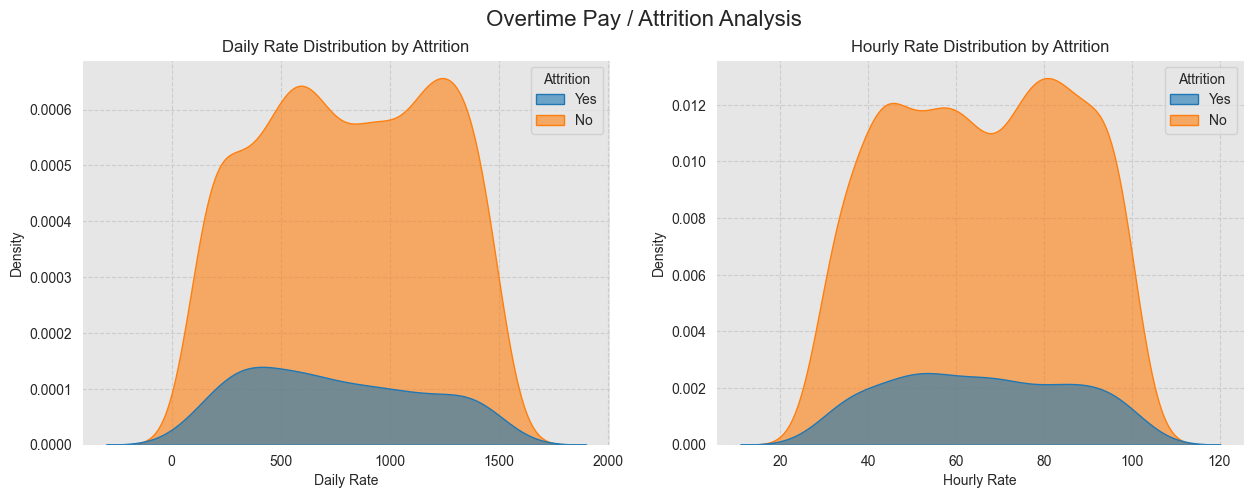

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Overtime Pay / Attrition Analysis', fontsize=16)

fig1 = sns.kdeplot(data=df, 
    x='DailyRate', 
    hue='Attrition',
    fill=True, 
    alpha=0.6, 
    ax=ax[0])       # Plot a kdeplot of DailyRate by Attrition
fig1.set_title('Daily Rate Distribution by Attrition')
fig1.set_xlabel('Daily Rate')

fig2 = sns.kdeplot(data=df, 
    x='HourlyRate', 
    hue='Attrition',
    fill=True, 
    alpha=0.6, 
    ax=ax[1])       # Plot a kdeplot of HourlyRate by Attrition
fig2.set_title('Hourly Rate Distribution by Attrition')
fig2.set_xlabel('Hourly Rate')

Text(0.5, 0, 'Hourly Rate')

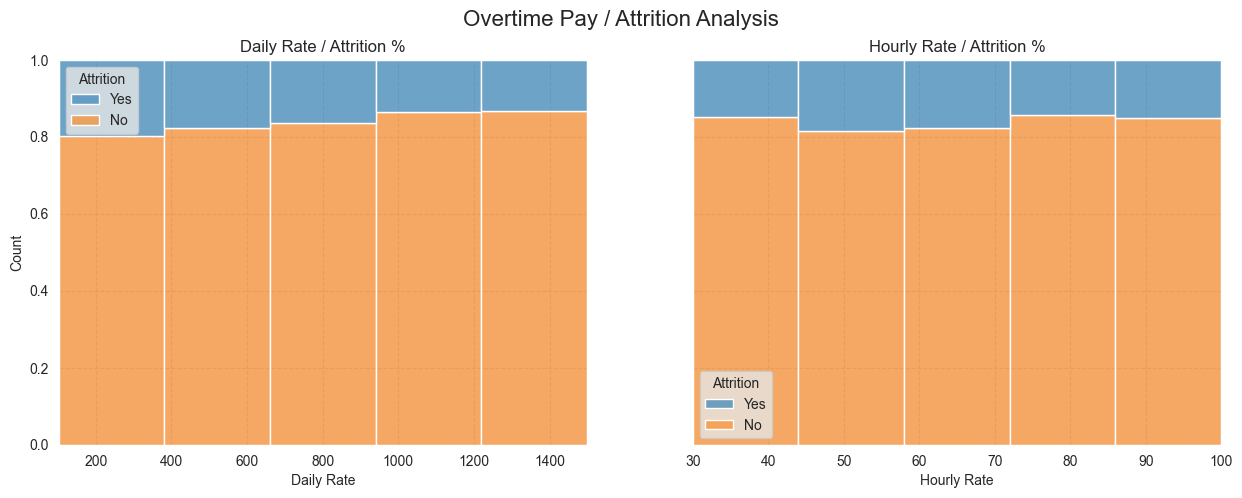

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True) # Create a figure with two subplots
fig.suptitle('Overtime Pay / Attrition Analysis', fontsize=16)

fig1 = sns.histplot(data=df, 
    x='DailyRate', 
    hue='Attrition', 
    multiple='fill', 
    bins=5, 
    ax=ax[0], 
    alpha=0.6)      # Plot a histogram of DailyRate by Attrition
fig1.set_title('Daily Rate / Attrition %')
fig1.set_xlabel('Daily Rate')

fig2 = sns.histplot(data=df, 
    x='HourlyRate', 
    hue='Attrition', 
    multiple='fill', 
    bins=5, 
    ax=ax[1], 
    alpha=0.6)      # Plot a histogram of HourlyRate by Attrition
fig2.set_title('Hourly Rate / Attrition %')
fig2.set_xlabel('Hourly Rate')

As we can conclude from these KDE and histogram plots, there seems to be a slight correlation between overtime pay rate and employee attrition. This correlation seems to be higher on the daily rate, with lower daily overtime rates generating higher employee attrition.

Text(0.5, 0, 'Yearly Rate')

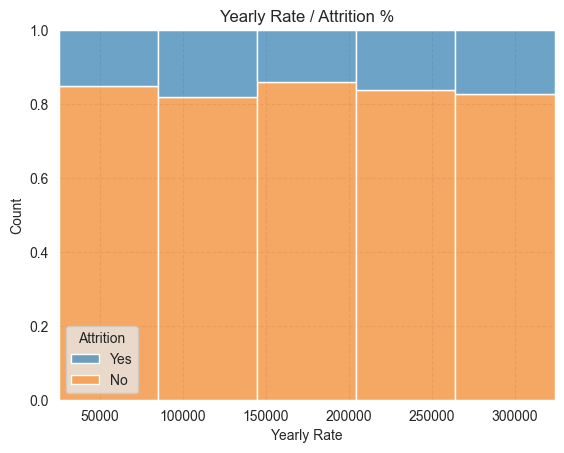

In [11]:
fig3 = sns.histplot(data=df, 
    x='YearlyRate', 
    hue='Attrition', 
    fill=True, 
    alpha=0.6, 
    bins=5, 
    multiple='fill') # Plot a kdeplot of YearlyRate by Attrition
fig3.set_title('Yearly Rate / Attrition %')
fig3.set_xlabel('Yearly Rate')

However, there doesn't seem to be a strong correlation between employee attrition and standard (without overtime) yearly rate.

### Length of Employment

The main objective of this part of the notebook is to understand the relationship between length of employment and employee attrition. These are the columns of the dataset that we will be analyzing:
- **YearsAtCompany**: Years since the employee was initially hired.
- **YearsInCurrentRole**: Years the empoylee has spent in their current position.
- **YearsWithCurrManager**: Years the employee has had their current manager.
- **TotalWorkingYears**: Years the employee has been active (in this or other positions).


Text(0.5, 0, 'Years At Company')

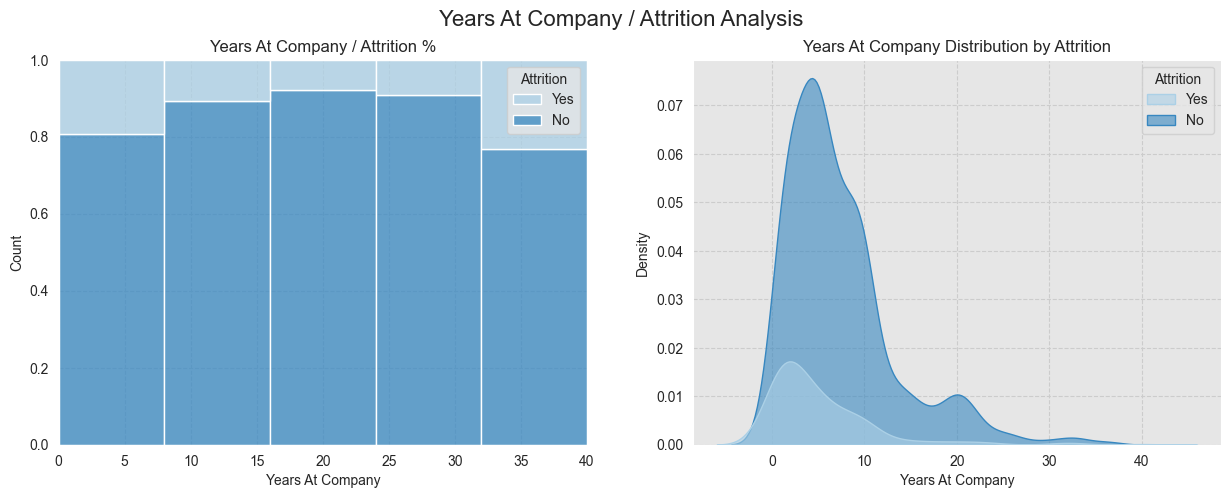

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Years At Company / Attrition Analysis', fontsize=16)

fig4 = sns.histplot(data=df, 
    x='YearsAtCompany', 
    hue='Attrition', 
    multiple='fill', 
    bins=5, 
    ax=ax[0], 
    palette='Blues')        # Plot a histogram of YearsAtCompany by Attrition
fig4.set_title('Years At Company / Attrition %')
fig4.set_xlabel('Years At Company')
fig5 = sns.kdeplot(data=df, 
    x='YearsAtCompany', 
    hue='Attrition', 
    fill=True, 
    alpha=0.6, 
    ax=ax[1], 
    palette='Blues')        # Plot a kdeplot of YearsAtCompany by Attrition
fig5.set_title('Years At Company Distribution by Attrition')
fig5.set_xlabel('Years At Company')

Text(0.5, 0, 'Years In Current Role')

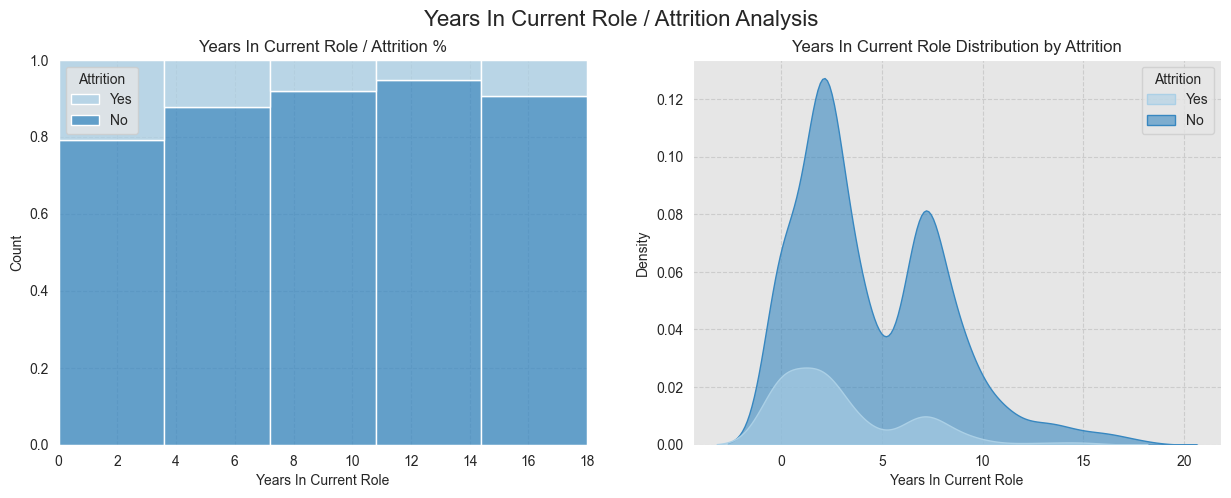

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Years In Current Role / Attrition Analysis', fontsize=16)

fig6 = sns.histplot(data=df, 
    x='YearsInCurrentRole', 
    hue='Attrition',
    multiple='fill', 
    bins=5, 
    ax=ax[0], 
    palette='Blues')        # Plot a histogram of YearsInCurrentRole by Attrition
fig6.set_title('Years In Current Role / Attrition %')
fig6.set_xlabel('Years In Current Role')

fig7 = sns.kdeplot(data=df, 
    x='YearsInCurrentRole', 
    hue='Attrition', 
    fill=True, 
    alpha=0.6, 
    ax=ax[1], 
    palette='Blues')        # Plot a kdeplot of YearsInCurrentRole by Attrition
fig7.set_title('Years In Current Role Distribution by Attrition')
fig7.set_xlabel('Years In Current Role')

Text(0.5, 0, 'Years Since Last Promotion')

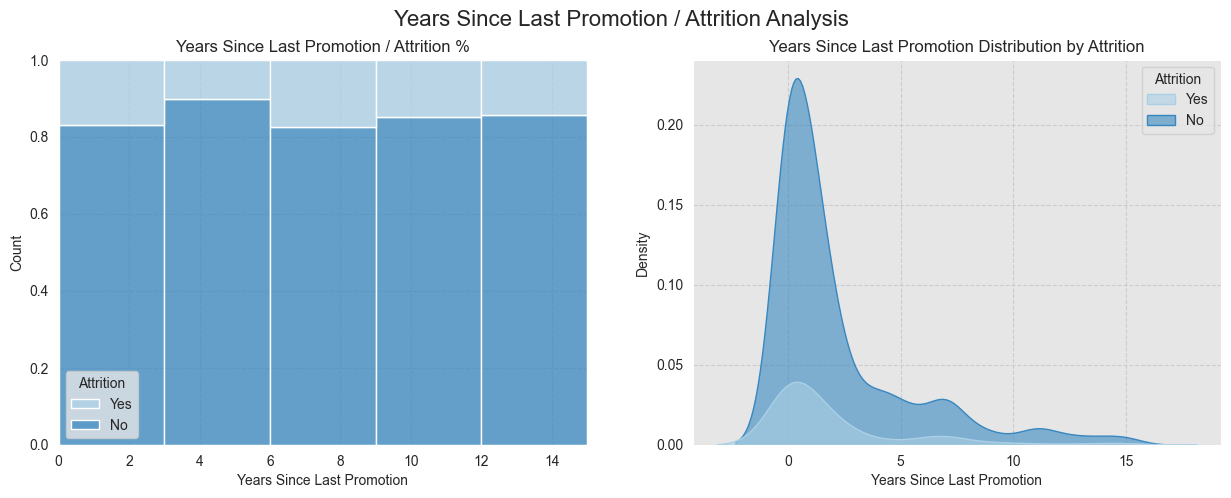

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Years Since Last Promotion / Attrition Analysis', fontsize=16)

fig8 = sns.histplot(data=df, 
    x='YearsSinceLastPromotion', 
    hue='Attrition', 
    multiple='fill', 
    bins=5, 
    ax=ax[0], 
    palette='Blues')        # Plot a histogram of YearsSinceLastPromotion by Attrition
fig8.set_title('Years Since Last Promotion / Attrition %')
fig8.set_xlabel('Years Since Last Promotion')

fig9 = sns.kdeplot(data=df, 
    x='YearsSinceLastPromotion', 
    hue='Attrition', 
    fill=True, 
    alpha=0.6,
    ax=ax[1], 
    palette='Blues')        # Plot a kdeplot of YearsSinceLastPromotion by Attrition
fig9.set_title('Years Since Last Promotion Distribution by Attrition')
fig9.set_xlabel('Years Since Last Promotion')

Text(0.5, 0, 'Years With Current Manager')

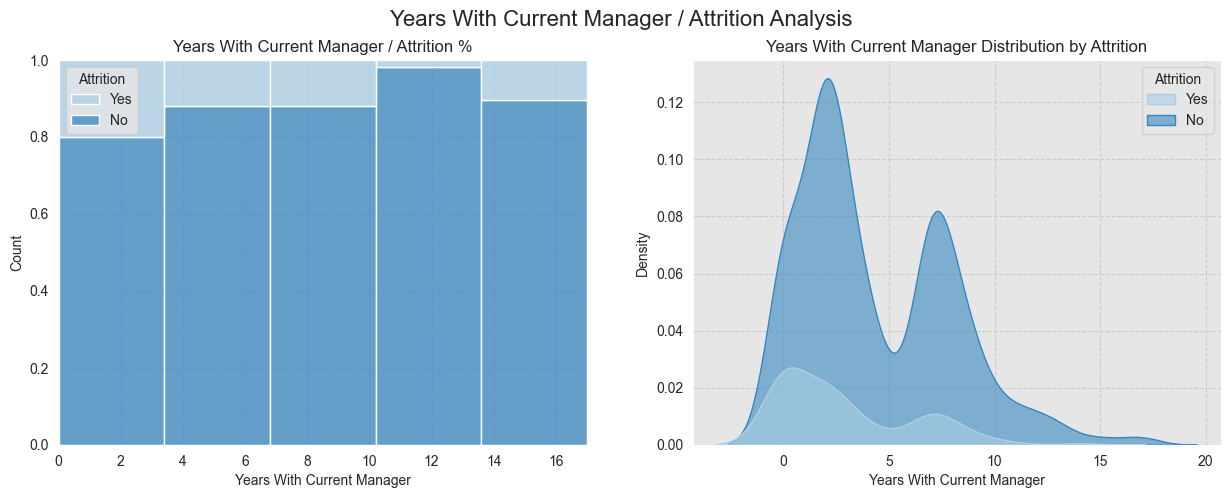

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Years With Current Manager / Attrition Analysis', fontsize=16)

fig10 = sns.histplot(data=df, 
    x='YearsWithCurrManager', 
    hue='Attrition', 
    multiple='fill', 
    bins=5, 
    ax=ax[0], 
    palette='Blues')    # Plot a histogram of YearsWithCurrManager by Attrition
fig10.set_title('Years With Current Manager / Attrition %')
fig10.set_xlabel('Years With Current Manager')

fig11 = sns.kdeplot(data=df, 
    x='YearsWithCurrManager', 
    hue='Attrition',
    fill=True, 
    alpha=0.6, 
    ax=ax[1],
    palette='Blues')     # Plot a kdeplot of YearsWithCurrManager by Attrition
fig11.set_title('Years With Current Manager Distribution by Attrition')
fig11.set_xlabel('Years With Current Manager')

From this analysis, we can conclude that there seems to be some correlation between employee attrition and length of employment. Employees who have been working at the company for a longer period of time seem to be less likely to leave the company. This is especially true for employees who have been working at the company for 10 years or more. This could be due to the fact that employees who have been working at the company for a longer period of time are more likely to have a higher salary, which could be a factor in their decision to stay at the company.

### Department & Environment

In this section of the notebook, we will focus on analyzing employee attrition rates across different departments within the organization. The purpose of this analysis is to identify which departments are more likely to experience higher levels of attrition, and to understand the factors that contribute to this trend. For this analysis, we will be using the following columns of our dataset:
- **Department**: Indicates the employee's department. In this dataset, it can be either HR [1], R&D [2], or Sales [3]. In this analysis, we will be doing a 'by department' analysis.
- **JobRole**: Specifies the employee's role in the department.
- **EnvironmentSatisfaction** : Indicates the employee's satisfaction with the work environment. Numerical scale from 1 (Low) to 4 (Very High).
- **JobSatisfaction**: Employee's satisfaction with their job role. Numerical scale from 1 (Low) to 4 (Very High).

Even though *EnvironmentSatisfaction* and *JobSatisfaction* could be included in the next part of the analysis, we decided to include it here because it's closely linked to the employee's role and department.



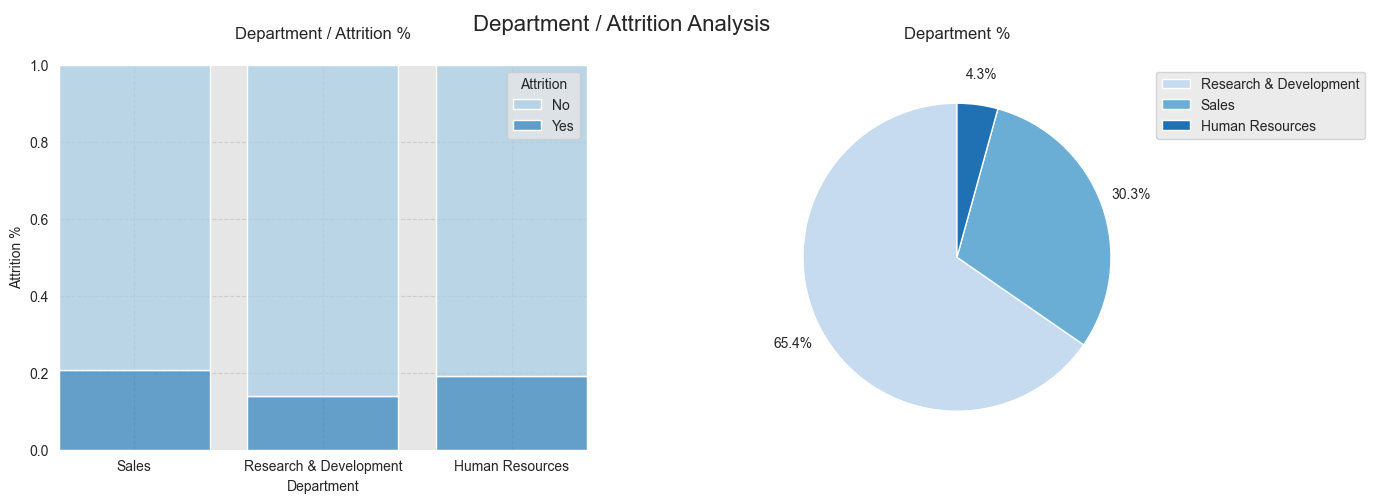

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
piecolors = sns.color_palette('Blues', 3) # Create a list of colors
fig.suptitle('Department / Attrition Analysis', fontsize=16)

fig12 = sns.histplot(
    data=df, 
    x='Department', 
    hue='Attrition',
    hue_order=['No', 'Yes'], 
    multiple='fill', 
    ax=ax[0], 
    palette='Blues', 
    shrink=0.8)             # Plot a histogram of Department by Attrition
fig12.set_title('\nDepartment / Attrition %\n')
fig12.set_ylabel('Attrition %')

fig13 = plt.pie(
    df['Department'].value_counts(),
    autopct='%1.1f%%', 
    startangle=90, 
    colors=piecolors, 
    pctdistance=1.2, 
    labeldistance=1.25)     # Plot a pie chart of Department
fig13 = plt.title('\nDepartment %\n')
plt.legend(df['Department'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

Text(0, 0.5, 'Environment Satisfaction (1-4)')

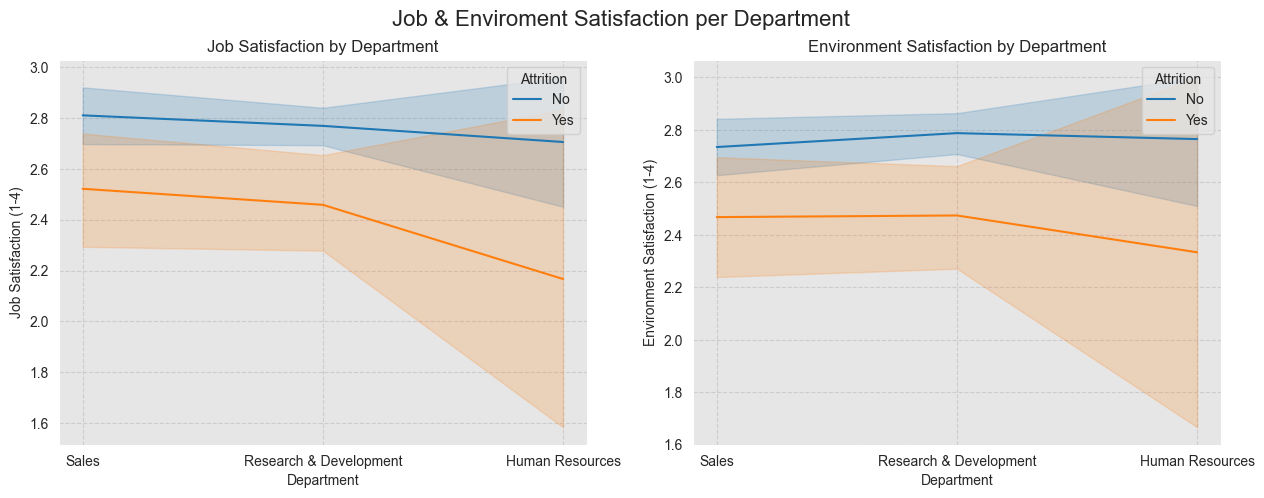

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Job & Enviroment Satisfaction per Department', fontsize=16)

fig14 = sns.lineplot(data=df,
    x='Department',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[0])
fig14.set_title('Job Satisfaction by Department')
fig14.set_ylabel('Job Satisfaction (1-4)')

fig15 = sns.lineplot(data=df,
    x='Department',
    y='EnvironmentSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])
fig15.set_title('Environment Satisfaction by Department')
fig15.set_ylabel('Environment Satisfaction (1-4)')

In [18]:
# Calculate number of employees who left and stayed in each department
department = df.groupby(['Department', 'Attrition']).size().unstack()
print('Number of employees who left and stayed in each department:\n')
print(department,'\n')
print('Percentage of employees who left and stayed in each department:\n')
department_pct = department.div(department.sum(axis=1), axis=0) * 100
print(department_pct)

Number of employees who left and stayed in each department:

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92 

Percentage of employees who left and stayed in each department:

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


#### Human Resources Department

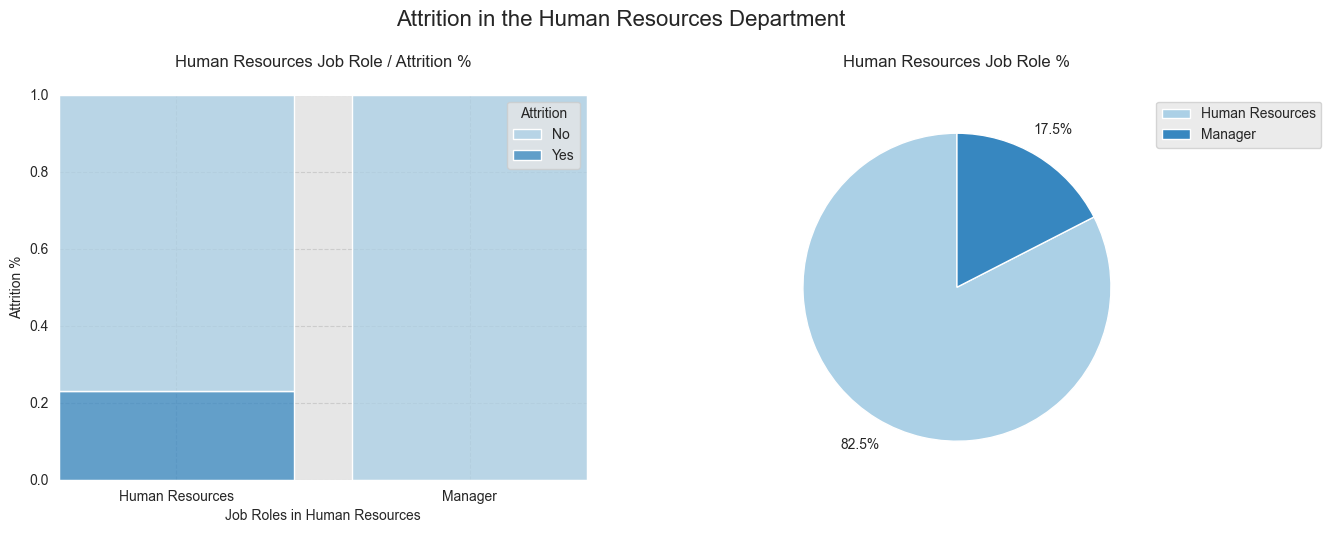

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Attrition in the Human Resources Department', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('Blues', 2) # Create a list of colors

human_resources = df[df['Department'] == 'Human Resources'] # Create a dataframe of Human Resources
fig16 = sns.histplot(data=human_resources, 
    x='JobRole', 
    hue='Attrition', 
    multiple='fill', 
    ax=ax[0], 
    palette='Blues', 
    shrink=0.8)             # Plot a histogram of JobRole by Attrition
fig16.set_title('Human Resources Job Role / Attrition %', y=1.05, x=0.5)
fig16.set_xlabel('Job Roles in Human Resources')
fig16.set_ylabel('Attrition %')

fig16 = plt.pie(human_resources['JobRole'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=piecolors,
    pctdistance=1.2,
    labeldistance=1.25)     # Plot a pie chart of JobRole
fig16 = plt.title('Human Resources Job Role %', y=1.05, x=0.5)
plt.legend(human_resources['JobRole'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

The Human Resources Department has the second highest attrition rate, with a 19.04% rate. This is a very high attrition rate, and it's important to understand the factors that contribute to this trend. The following graph shows the distribution of employee satisfaction levels in the HR department.

Text(0.5, 0, 'Job Roles in Human Resources')

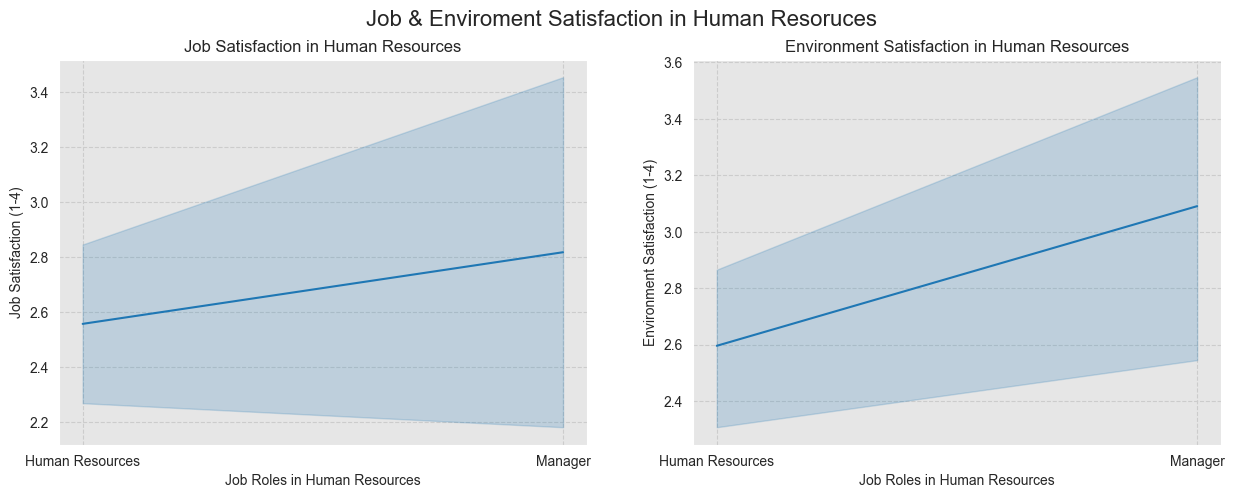

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Job & Enviroment Satisfaction in Human Resoruces', fontsize=16)

fig17 = sns.lineplot(data=human_resources,
    x='JobRole',
    y='JobSatisfaction',
    ax=ax[0])
fig17.set_title('Job Satisfaction in Human Resources')
fig17.set_ylabel('Job Satisfaction (1-4)')
fig17.set_xlabel('Job Roles in Human Resources')

fig18 = sns.lineplot(data=human_resources,
    x='JobRole',
    y='EnvironmentSatisfaction',
    ax=ax[1])
fig18.set_title('Environment Satisfaction in Human Resources')
fig18.set_ylabel('Environment Satisfaction (1-4)')
fig18.set_xlabel('Job Roles in Human Resources')

#### Research & Development Department

C:\Users\esser\AppData\Local\Temp\ipykernel_5688\1060278202.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  fit19.set_xticklabels(fit19.get_xticklabels(), rotation=45, horizontalalignment='right')


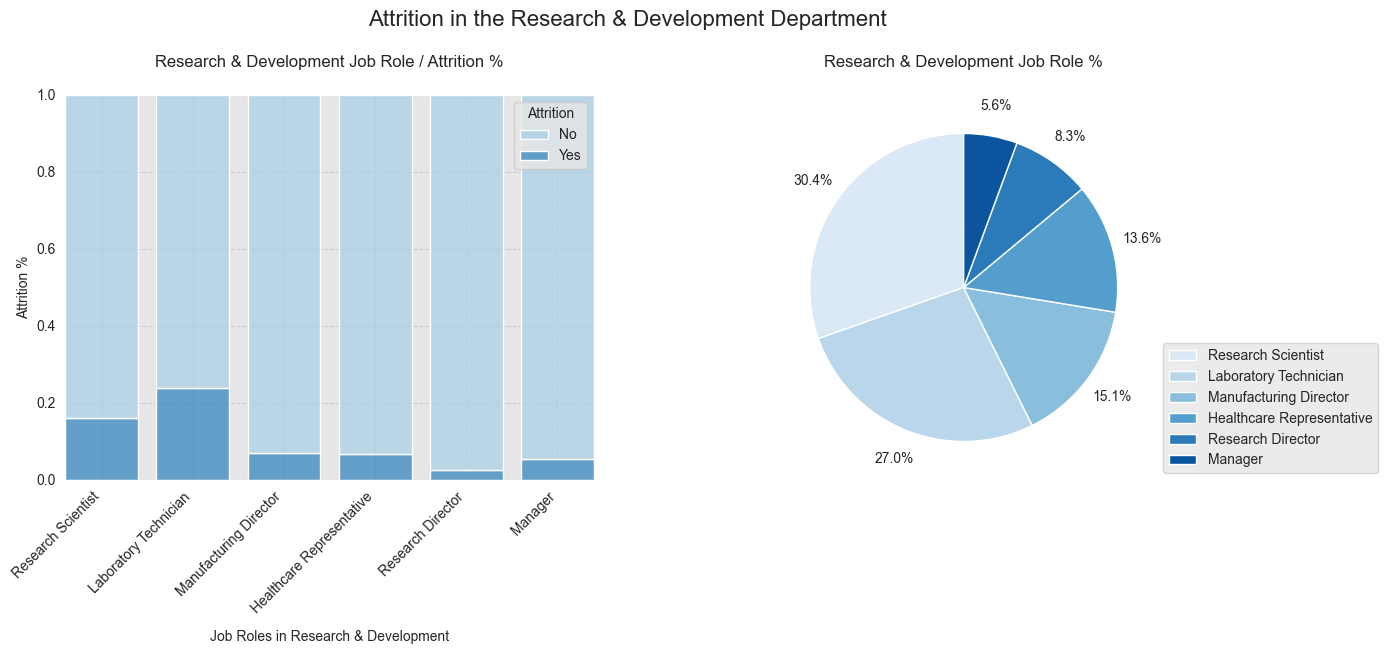

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Attrition in the Research & Development Department', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('Blues', 6) # Create a list of colors

research_development = df[df['Department'] == 'Research & Development'] # Create a dataframe of Research & Development

fit19 = sns.histplot(data=research_development,
    x='JobRole',
    hue='Attrition',
    multiple='fill',
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of JobRole by Attrition
fit19.set_title('Research & Development Job Role / Attrition %', y=1.05, x=0.5)
fit19.set_xlabel('Job Roles in Research & Development', labelpad=10)
fit19.set_xticklabels(fit19.get_xticklabels(), rotation=45, horizontalalignment='right')
fit19.set_ylabel('Attrition %')

fig20 = plt.pie(research_development['JobRole'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=piecolors,
    pctdistance=1.2,
    labeldistance=1.25)     # Plot a pie chart of JobRole
fig20 = plt.title('Research & Development Job Role %', y=1.05, x=0.5)
plt.legend(research_development['JobRole'].value_counts().index, loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

C:\Users\esser\AppData\Local\Temp\ipykernel_5688\604810396.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig21.set_xticklabels(fig21.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\esser\AppData\Local\Temp\ipykernel_5688\604810396.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig22.set_xticklabels(fig22.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Research Scientist'),
 Text(1, 0, 'Laboratory Technician'),
 Text(2, 0, 'Manufacturing Director'),
 Text(3, 0, 'Healthcare Representative'),
 Text(4, 0, 'Research Director'),
 Text(5, 0, 'Manager')]

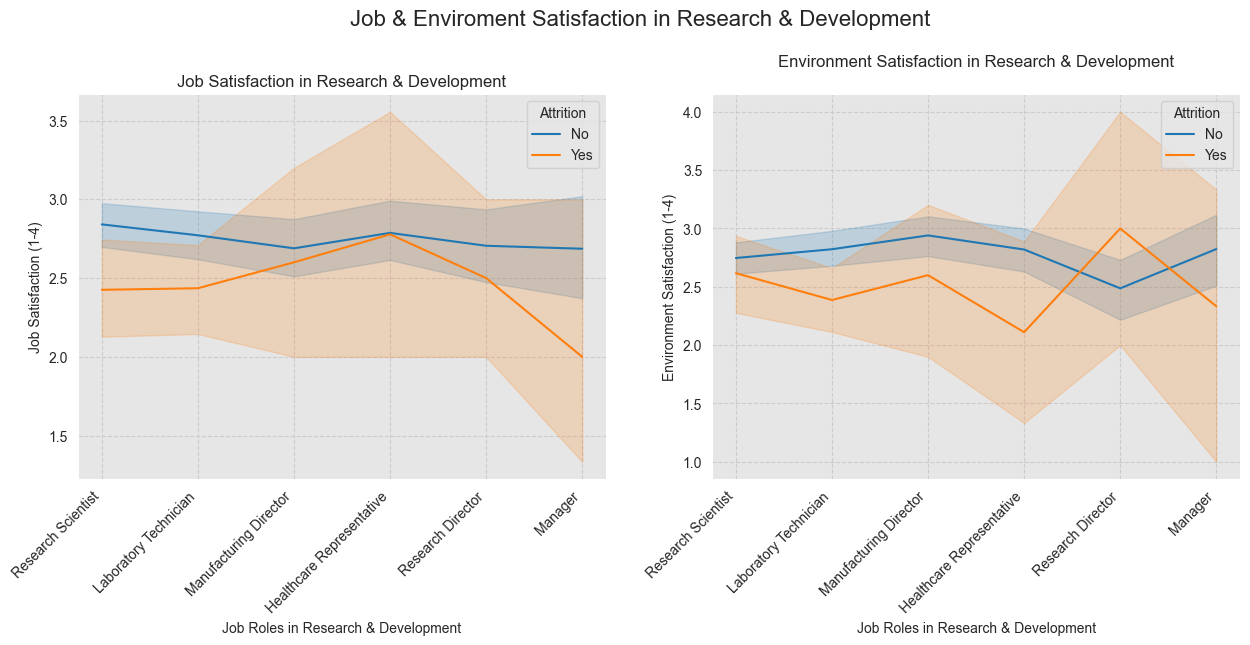

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Job & Enviroment Satisfaction in Research & Development', fontsize=16, y=1.05, x=0.5)

fig21 = sns.lineplot(data=research_development,
    x='JobRole',
    y='JobSatisfaction',
    hue='Attrition',
    ax=ax[0])
fig21.set_title('Job Satisfaction in Research & Development', )
fig21.set_ylabel('Job Satisfaction (1-4)')
fig21.set_xlabel('Job Roles in Research & Development')
fig21.set_xticklabels(fig21.get_xticklabels(), rotation=45, horizontalalignment='right')

fig22 = sns.lineplot(data=research_development,
    x='JobRole',
    y='EnvironmentSatisfaction',
    hue='Attrition',
    ax=ax[1])
fig22.set_title('Environment Satisfaction in Research & Development', y=1.05, x=0.5)
fig22.set_ylabel('Environment Satisfaction (1-4)')
fig22.set_xlabel('Job Roles in Research & Development')
fig22.set_xticklabels(fig22.get_xticklabels(), rotation=45, horizontalalignment='right')


The Research & Development Department has the lowest attrition rate, with a 13.83% rate. This is a fairly normal attrition rate, but it's still important to keep an eye on this department to make sure that attrition rates don't start to increase.

#### Sales Department

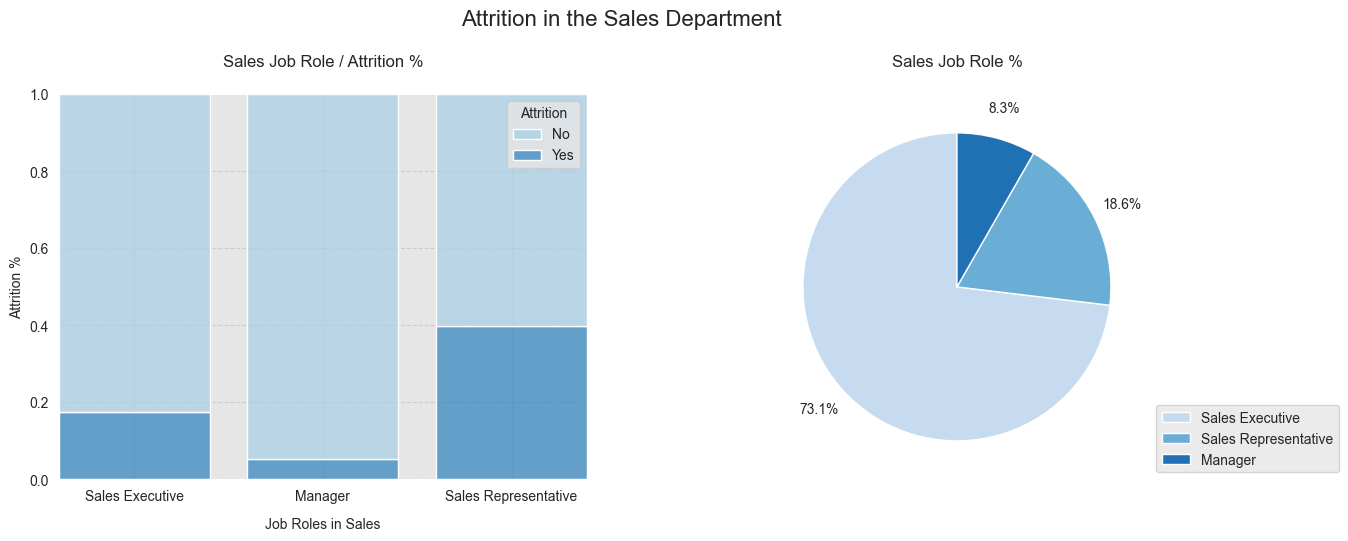

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Attrition in the Sales Department', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('Blues', 3) # Create a list of colors

sales = df[df['Department'] == 'Sales'] # Create a dataframe of Sales

fig23 = sns.histplot(data=sales,
    x='JobRole',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of JobRole by Attrition
fig23.set_title('Sales Job Role / Attrition %', y=1.05, x=0.5)
fig23.set_xlabel('Job Roles in Sales', labelpad=10)
fig23.set_ylabel('Attrition %')

fig24 = plt.pie(sales['JobRole'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=piecolors,
    pctdistance=1.2,
    labeldistance=1.25)     # Plot a pie chart of JobRole
fig24 = plt.title('Sales Job Role %', y=1.05, x=0.5)
plt.legend(sales['JobRole'].value_counts().index, loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

Text(0, 0.5, 'Environment Satisfaction (1-4)')

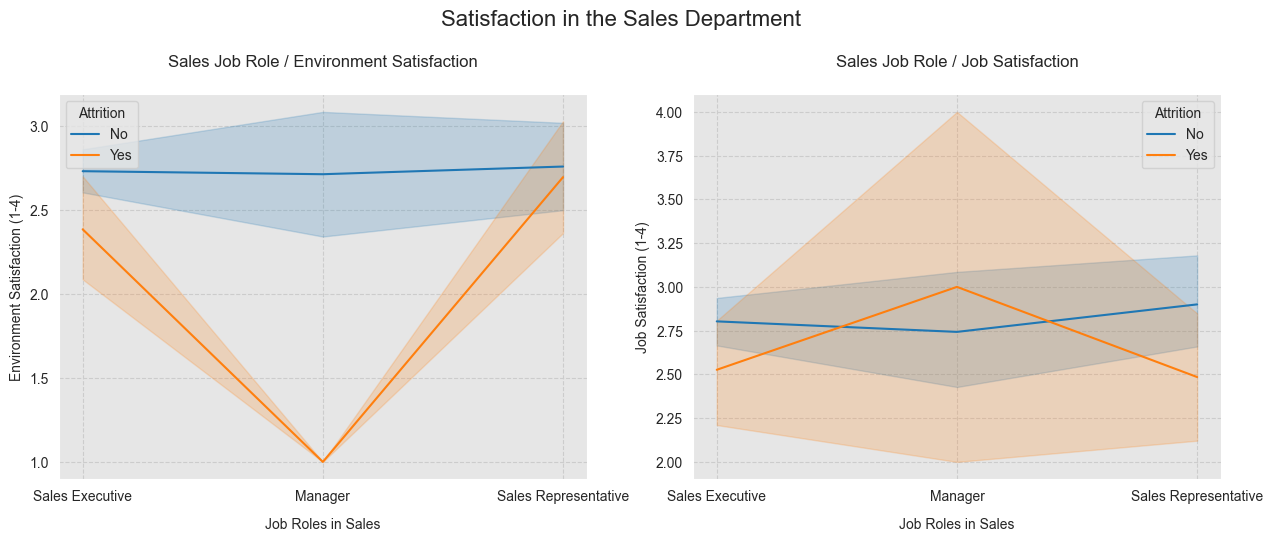

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Satisfaction in the Sales Department', fontsize=16, y=1.05, x=0.5)

fig25 = sns.lineplot(data=sales, 
    x='JobRole', 
    y='JobSatisfaction', 
    hue='Attrition',
    hue_order=['No', 'Yes'], 
    ax=ax[1])
fig25.set_title('Sales Job Role / Job Satisfaction', y=1.05, x=0.5)
fig25.set_xlabel('Job Roles in Sales', labelpad=10)
fig25.set_ylabel('Job Satisfaction (1-4)')

fig26 = sns.lineplot(data=sales,
    x='JobRole',
    y='EnvironmentSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[0])
fig26.set_title('Sales Job Role / Environment Satisfaction', y=1.05, x=0.5)
fig26.set_xlabel('Job Roles in Sales', labelpad=10)
fig26.set_ylabel('Environment Satisfaction (1-4)')

The Sales Department has the highest attrition rate in the company, with a 22.62% rate. This is even higher for the Sales Representative Role, with an almost 40% attrition rate.

### Employee Information

This section of the notebook focuses on understanding the different situations, external factors, and circumstances of employees on the company. This type of analysis is important because it provides insights into the factors that may have contributed to employee attrition. For this analysis, we will be using the following columns of the dataset:
- **Gender**: Self-explanatory. Stored as a string, either 'Male' or 'Female'.
- **Age**: Self-explanatory. Stored as a numerical value, ranging from 18 to 60 in this dataset.
- **MaritalStatus**: Indicates the marital status of the employee. Can be 'Divorced', 'Married' or 'Single'.
- **DistanceFromHome**: Distance the employee has to commute from home, stored in miles.
- **Education**: Education level of the employee. Can be 'Bellow College', 'College', 'Bachelor', 'Master', or 'Doctor'.
- **EducationField**: Educantion field of the employee. Can be 'HR', 'Life Sciences', 'Marketing', 'Medical Sciences, 'Technical', or 'Others'.
- **NumCompaniesWorked**: Number of companies the employee has previously worked at before IBM. Numerical value.
- **TotalWorkingYears**: Total of years the employee has been actively working at this and other companies. Numerical value.

#### Gender

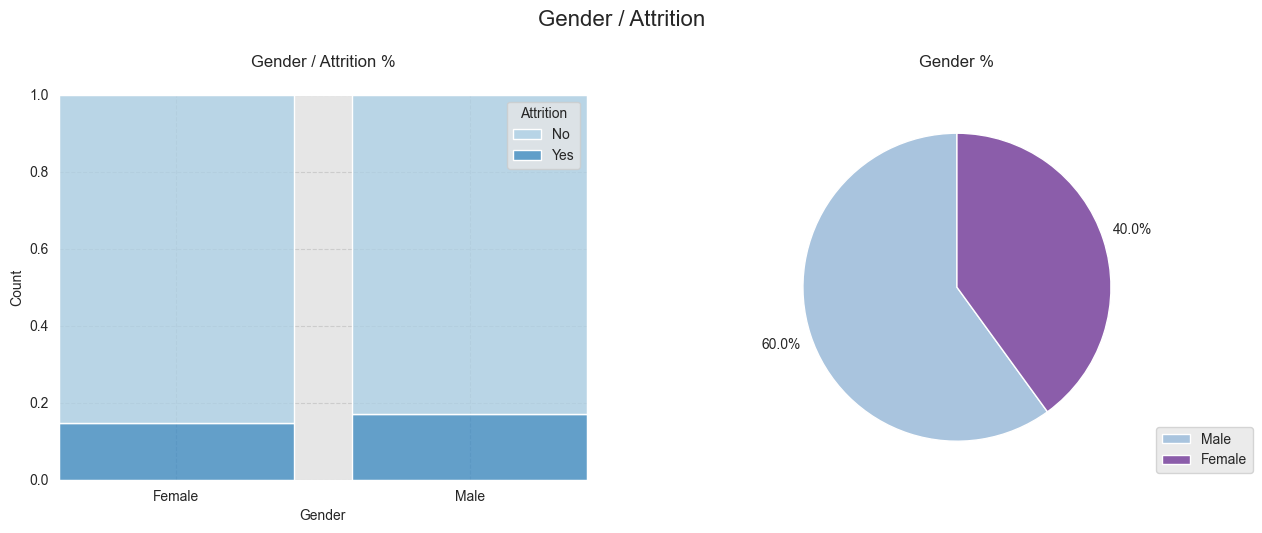

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Gender / Attrition', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('BuPu', 2) # Create a list of colors

fig27 = plt.pie(
    df['Gender'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=piecolors,
    pctdistance=1.2)        # Plot a pie chart of Gender
fig27 = plt.title('Gender %', y=1.05, x=0.5)

fig28 = sns.histplot(data=df,
    x='Gender',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of Age by Attrition
fig28.set_title('Gender / Attrition %', y=1.05, x=0.5)
plt.legend(df['Gender'].value_counts().index, loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

The attrition rate is practically the same for both men and women, so gender doesn't seem to be a factor in employee attrition.

#### Age

Text(0.5, 1.05, 'Age Distribution')

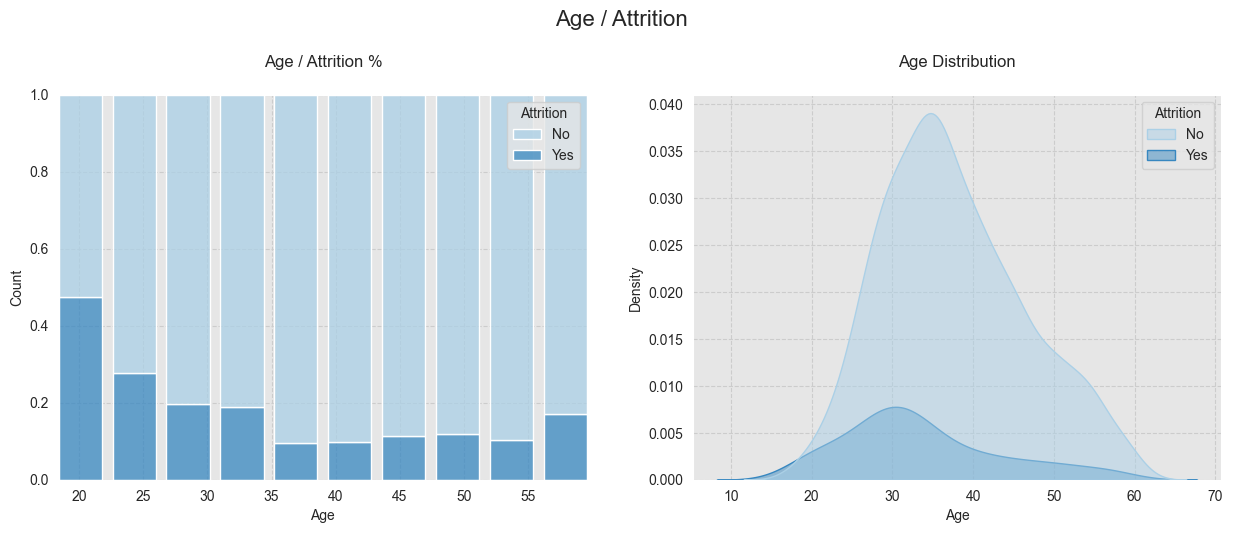

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Age / Attrition', fontsize=16, y=1.05, x=0.5)

fig29 = sns.histplot(data=df,
    x='Age',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    bins = 10,
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of Age by Attrition
fig29.set_title('Age / Attrition %', y=1.05, x=0.5)

fig30 = sns.kdeplot(data=df,
    x='Age',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1],
    palette='Blues',
    fill=True,
    alpha=0.5)              # Plot a KDE of Age by Attrition
fig30.set_title('Age Distribution', y=1.05, x=0.5)

Text(0, 0.5, 'Age')

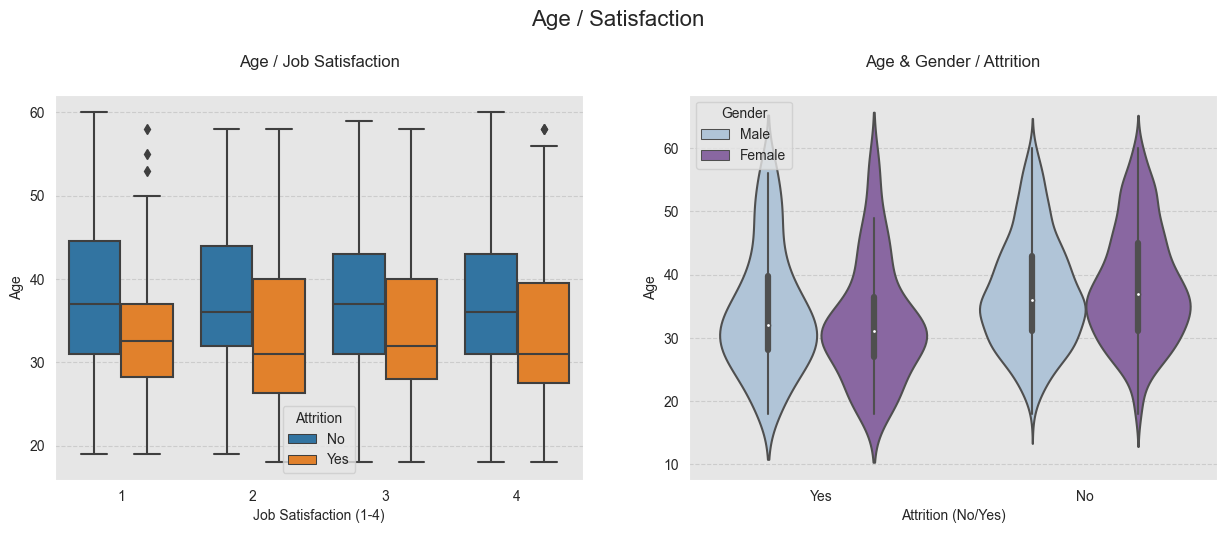

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Age / Satisfaction', fontsize=16, y=1.05, x=0.5)

fig30_1 = sns.boxplot(data=df,
    y='Age',
    x='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[0],)
fig30_1.set_title('Age / Job Satisfaction', y=1.05, x=0.5)
fig30_1.set_xlabel('Job Satisfaction (1-4)')

fig30_2 = sns.violinplot(data=df,
    y='Age',
    x='Attrition',
    hue = 'Gender',
    hue_order=['Male', 'Female'],
    palette='BuPu'
)
fig30_2.set_title('Age & Gender / Attrition', y=1.05, x=0.5)
fig30_2.set_xlabel('Attrition (No/Yes)')
fig30_2.set_ylabel('Age')

Age seems to be an important factor in employee attrition. The attrition rate is higher in younger employees, and it decreases as the employee gets older, only to increase again slightly in older employees. This could be due to the fact that younger employees are more likely to be looking for a job that pays more, starting usually with a lower salary than older employees. 

There could also be some correlation with the fact that older employees are more likely to have a family, and they are more likely to stay at the company to provide for their family.

#### Marital Status

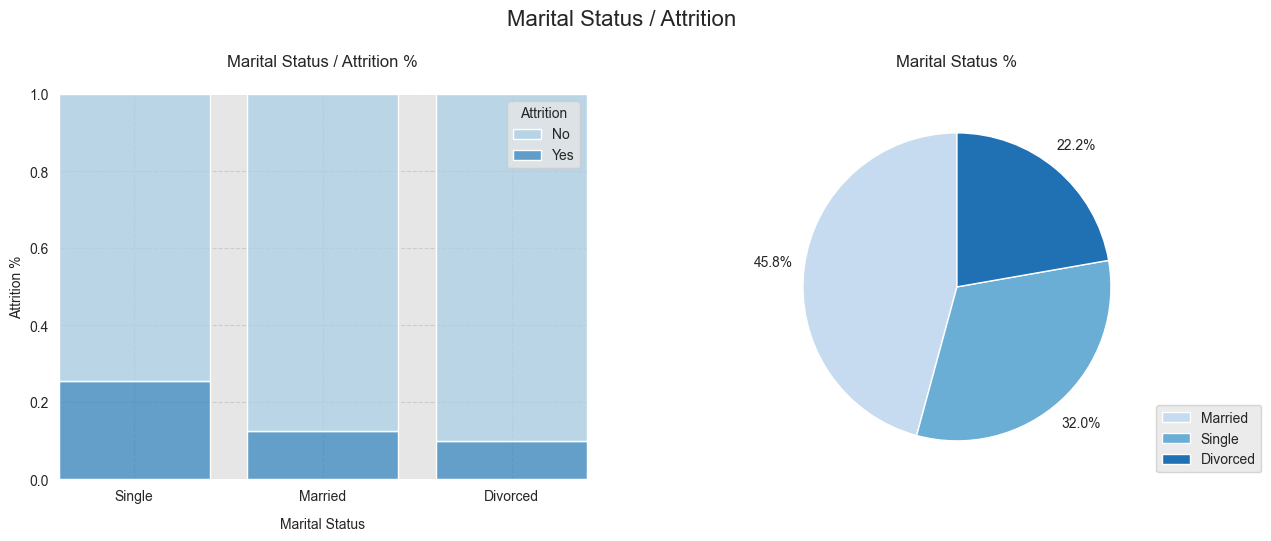

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Marital Status / Attrition', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('Blues', 3) # Create a list of colors

fig31 = sns.histplot(data=df,
    x='MaritalStatus',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of MaritalStatus by Attrition
fig31.set_title('Marital Status / Attrition %', y=1.05, x=0.5)
fig31.set_xlabel('Marital Status', labelpad=10)
fig31.set_ylabel('Attrition %')

fig32 = plt.pie(df['MaritalStatus'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=piecolors,
    pctdistance=1.2,
    labeldistance=1.25)     # Plot a pie chart of MaritalStatus
fig32 = plt.title('Marital Status %', y=1.05, x=0.5)
plt.legend(df['MaritalStatus'].value_counts().index, loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

Text(0, 0.5, 'Marital Status')

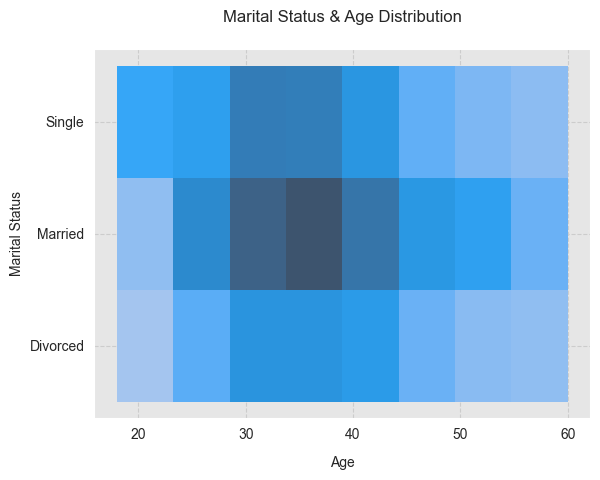

In [29]:
fig33 = sns.histplot(data=df,
    x='Age',
    y='MaritalStatus',
    bins=8,
    hue_order=['No', 'Yes'])        # Plot a histogram of MaritalStatus by Attrition
fig33.set_title('Marital Status & Age Distribution', y=1.05, x=0.5)
fig33.set_xlabel('Age', labelpad=10)
fig33.set_ylabel('Marital Status')

Single employees have a higher attrition rate than married or divorced employees.

#### Distance From Home

Text(0.5, 0, 'Distance From Home')

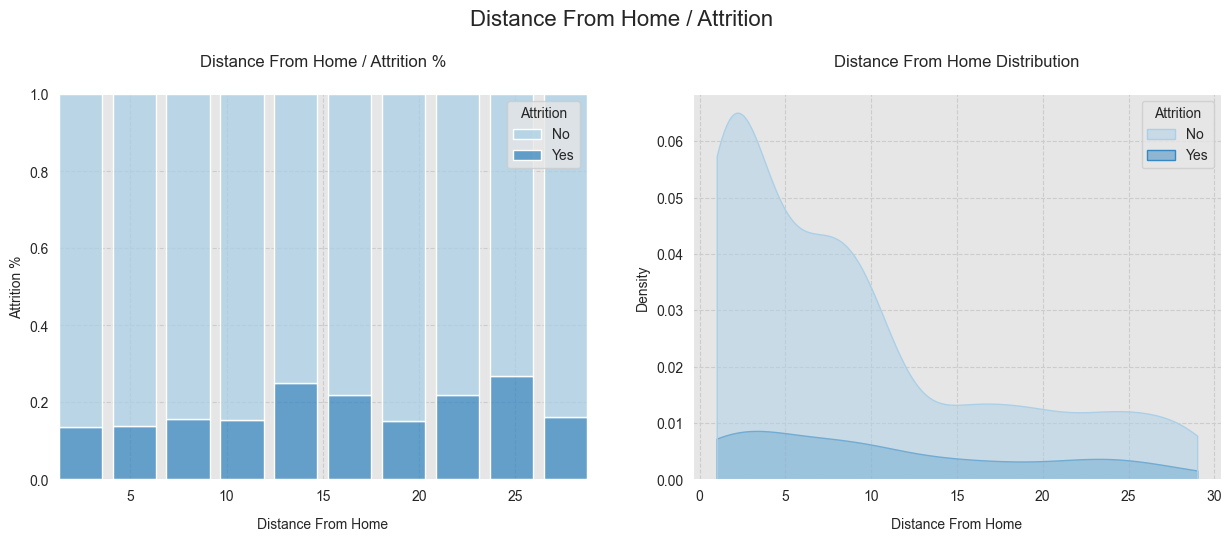

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Distance From Home / Attrition', fontsize=16, y=1.05, x=0.5)

fig34 = sns.histplot(data=df,
    x='DistanceFromHome',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    bins=10,
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of DistanceFromHome by Attrition
fig34.set_title('Distance From Home / Attrition %', y=1.05, x=0.5)
fig34.set_xlabel('Distance From Home', labelpad=10)
fig34.set_ylabel('Attrition %')

fig35 = sns.kdeplot(data=df,
    x='DistanceFromHome',
    hue='Attrition',
    cut=0,
    hue_order=['No', 'Yes'],
    ax=ax[1],
    palette='Blues',
    fill=True,
    alpha=0.5)              # Plot a KDE of DistanceFromHome by Attrition
fig35.set_title('Distance From Home Distribution', y=1.05, x=0.5)
fig35.set_xlabel('Distance From Home', labelpad=10)

The majority of the employees live within a 10 mile radius of the company. The attrition rate is higher for employees who live further away from the company, which could be due to the fact that they are more likely to be looking for a job closer to home.

#### Education

In [31]:
def education(x):        # Create a function to convert Education to a categorical variable
    if x == 1:
        return 'Below College'
    elif x == 2:
        return 'College'
    elif x == 3:
        return 'Bachelor'
    elif x == 4:
        return 'Master'
    elif x == 5:
        return 'Doctor'

df['Education'] = df['Education'].apply(education) # Apply the education function to the Education column
df['Education'] = pd.Categorical(df['Education'], 
    categories=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], 
    ordered=True) # Set the Education column to a categorical variable

C:\Users\esser\AppData\Local\Temp\ipykernel_5688\2813216043.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig37 = sns.histplot(data=df,
C:\Users\esser\AppData\Local\Temp\ipykernel_5688\2813216043.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig37.set_yticklabels(fig37.get_yticklabels(), rotation=55)


[Text(0, 0, 'Life Sciences'),
 Text(0, 1, 'Other'),
 Text(0, 2, 'Medical'),
 Text(0, 3, 'Marketing'),
 Text(0, 4, 'Technical Degree'),
 Text(0, 5, 'Human Resources')]

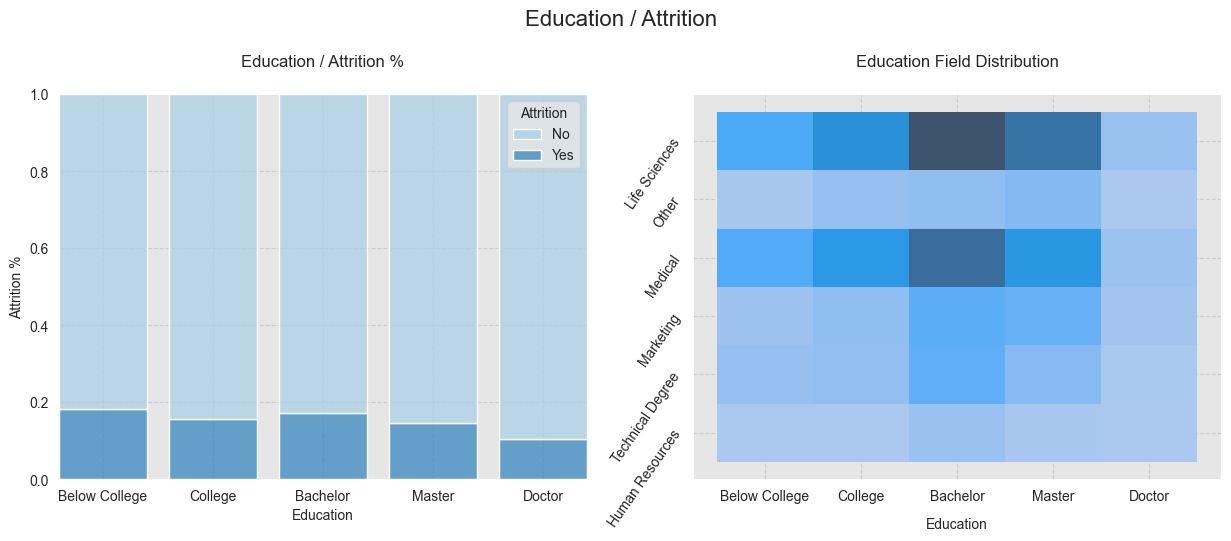

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Education / Attrition', fontsize=16, y=1.05, x=0.5)

fig36 = sns.histplot(data=df,
    x='Education',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of Education by Attrition
fig36.set_title('Education / Attrition %', y=1.05, x=0.5)
fig36.set_ylabel('Attrition %')

fig37 = sns.histplot(data=df,
    x='Education',
    y='EducationField',
    multiple='fill',
    ax=ax[1],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of Education by Attrition
fig37.set_title('Education Field Distribution', y=1.05, x=0.5)
fig37.set_xlabel('Education', labelpad=10)
fig37.set_ylabel('')
fig37.set_yticklabels(fig37.get_yticklabels(), rotation=55)

Text(0, 0.5, 'Education')

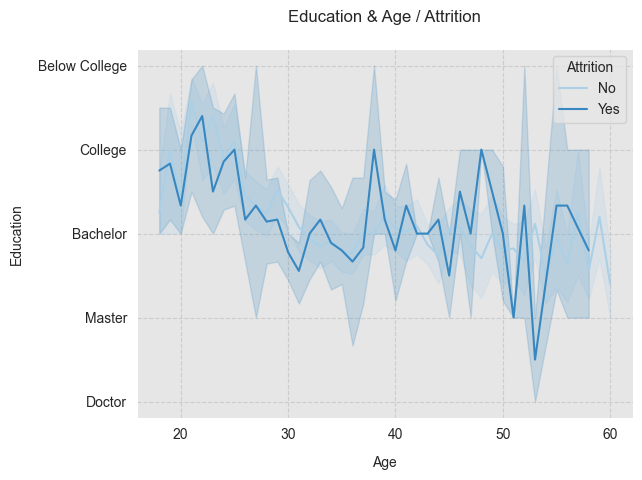

In [55]:
fig37_1 = sns.lineplot(data=df,
    x='Age',
    y='Education',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    palette='Blues')               # Plot a line plot of Education by Age and Attrition
fig37_1.set_title('Education & Age / Attrition', y=1.05, x=0.5)
fig37_1.set_xlabel('Age', labelpad=10)
fig37_1.set_ylabel('Education', labelpad=10)

Employees with a lower education level have a higher attrition rate than employees with higher education level. This seems to be in correlation with their age, as younger employees are more likely to have a lower education level.

#### Years Active at IBM or other companies

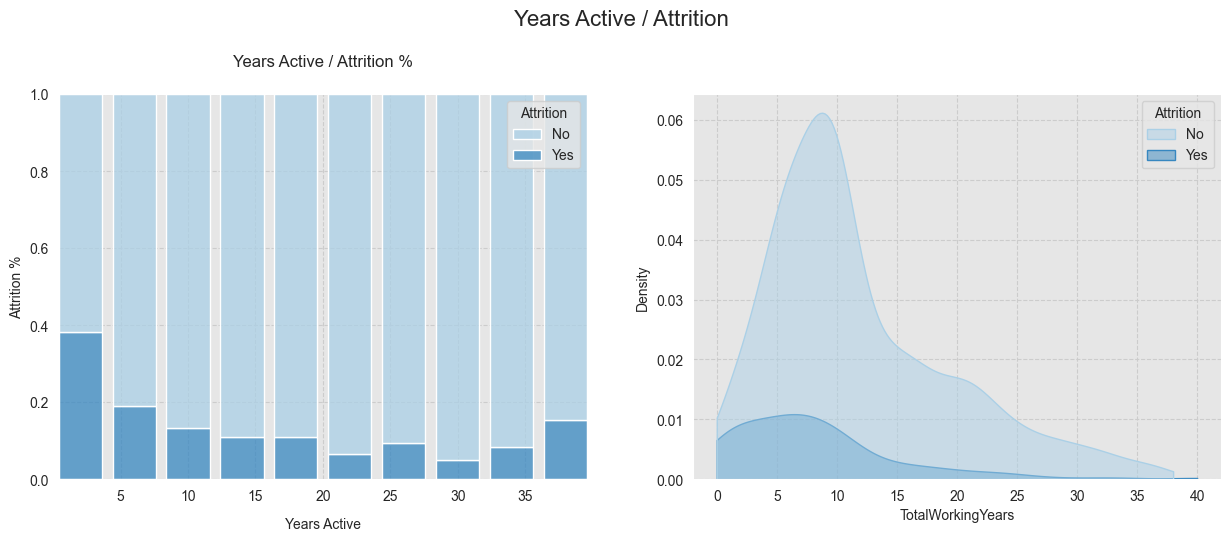

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Years Active / Attrition', fontsize=16, y=1.05, x=0.5)

fig40 = sns.histplot(data=df,
    x='TotalWorkingYears',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    bins=10,
    ax=ax[0],
    palette='Blues',
    shrink=0.8)             # Plot a histogram of YearsWorked by Attrition
fig40.set_title('Years Active / Attrition %', y=1.05, x=0.5)
fig40.set_xlabel('Years Active', labelpad=10)
fig40.set_ylabel('Attrition %')

fig41 = sns.kdeplot(data=df,
    x='TotalWorkingYears',
    hue='Attrition',
    cut=0,
    hue_order=['No', 'Yes'],
    ax=ax[1],
    palette='Blues',
    fill=True,
    alpha=0.5)              # Plot a KDE of YearsWorked by Attrition



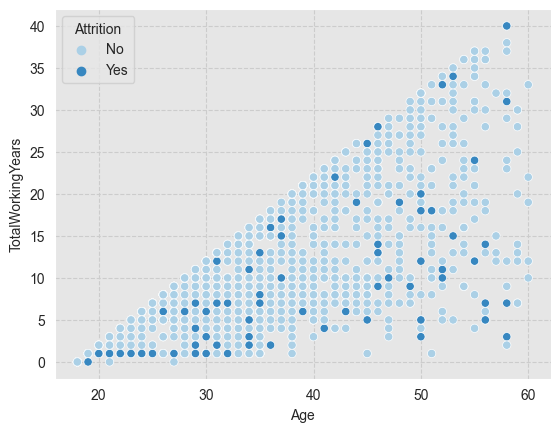

In [56]:
fig41_1 = sns.scatterplot(data=df,
    x='Age',
    y='TotalWorkingYears',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    palette='Blues')               # Plot a scatter plot of YearsWorked by Age and Attrition

In [36]:
# Convert the NumCompaniesWorked column to a categorical variable
df['NumCompaniesWorked_Categorical'] = pd.Categorical(df['NumCompaniesWorked'],
    categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    ordered=True)

Text(0.5, 0, 'Number of Companies Worked')

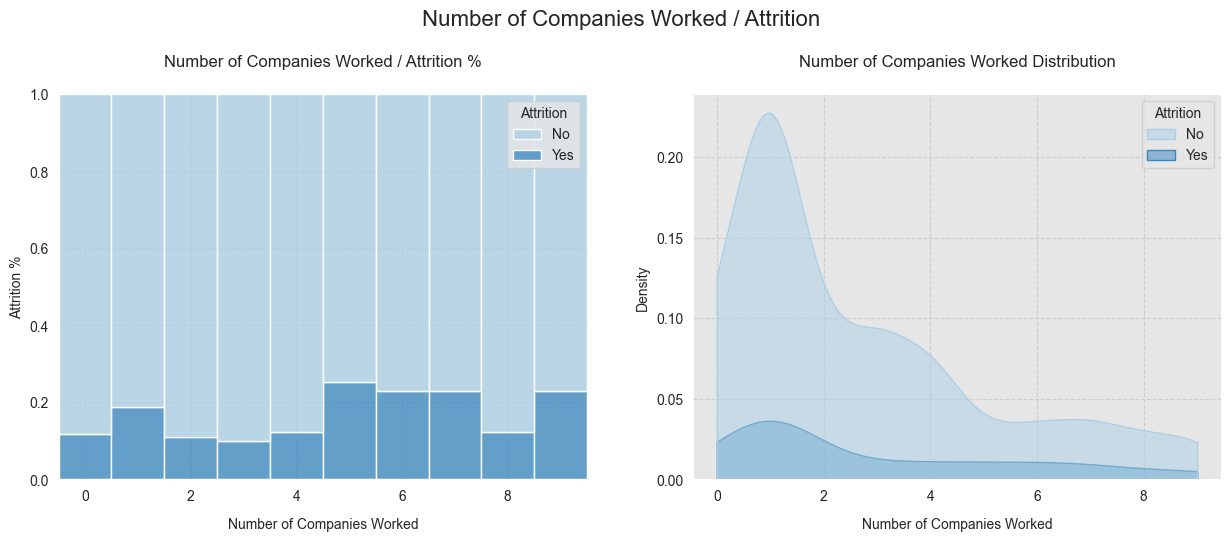

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Number of Companies Worked / Attrition', fontsize=16, y=1.05, x=0.5)

fig42 = sns.histplot(data=df,
    x='NumCompaniesWorked_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of NumCompaniesWorked by Attrition
fig42.set_title('Number of Companies Worked / Attrition %', y=1.05, x=0.5)
fig42.set_xlabel('Number of Companies Worked', labelpad=10)
fig42.set_ylabel('Attrition %')

fig43 = sns.kdeplot(data=df,
    x='NumCompaniesWorked',
    cut=0,
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1],
    palette='Blues',
    fill=True,
    alpha=0.5)              # Plot a KDE of NumCompaniesWorked by Attrition
fig43.set_title('Number of Companies Worked Distribution', y=1.05, x=0.5)
fig43.set_xlabel('Number of Companies Worked', labelpad=10)

There is a strong correlation between the number of years the employee has been working at IBM or other companies and employee attrition. Employees who have been working at IBM or other companies for a longer period of time are less likely to leave the company.

There is also a slight correlation between the number of companies the employee has worked at before IBM and employee attrition. Employees who have worked at more companies before IBM are more likely to leave the company.

### Employee Situation at the Company

This section focuses on the internal factors of the company that may have contributed to employee attrition. These internal factors can include aspects such as company culture, management practices, working conditions, job satisfaction, and opportunities for growth and development. These are the columns of the dataset that we will be analyzing:
- **BusinessTravel**: Indicates the frequency of business travel for the employee. Can be 'Non-Travel', 'Travel Frequently', or 'Travel Rarely'.
- **JobInvolvement**: Indicates the employee's level of involvement in their job role. Can be 'Low', 'Medium', 'High', or 'Very High'.
- **JobLevel**: Indicates the employee's job level. Can be 1, 2, 3, or 4.
- **OverTime**: Indicates whether the employee works overtime. Can be 'Yes' or 'No'.
- **PerformanceRating**: Indicates the employee's performance rating. Can be 'Low', 'Good', 'Excellent', or 'Outstanding'.
- **RelationshipSatisfaction**: Indicates the employee's satisfaction with their relationships at work. Can be 'Low', 'Medium', 'High', or 'Very High'.
- **WorkLifeBalance**: Indicates the employee's work-life balance. Can be 'Bad', 'Good', 'Better', or 'Best'.
- **StockOptionLevel**: Indicates the employee's stock option level. Can be 0, 1, 2, or 3.
- **TrainingTimesLastYear**: Indicates the number of training sessions the employee has attended in the last year. Numerical value.

#### Business Travel

In [38]:
# Order the BusinessTravel column
df['BusinessTravel'] = pd.Categorical(df['BusinessTravel'],
    categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ordered=True)

Text(0, 0.5, 'Job Satisfaction')

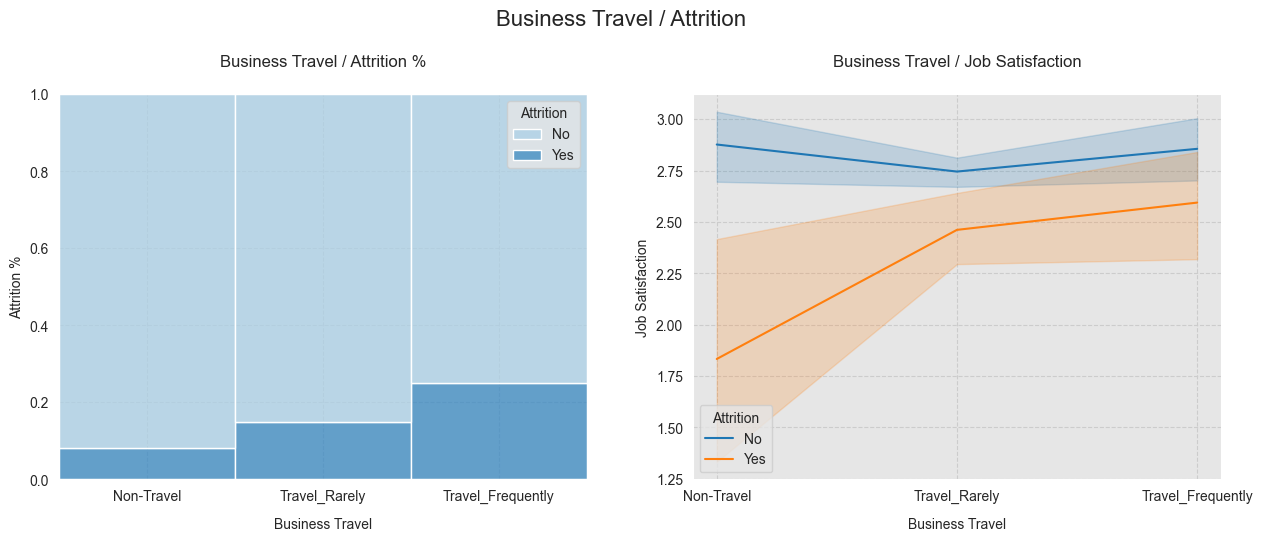

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Business Travel / Attrition', fontsize=16, y=1.05, x=0.5)

fig44 = sns.histplot(data=df,
    x='BusinessTravel',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of BusinessTravel by Attrition
fig44.set_title('Business Travel / Attrition %', y=1.05, x=0.5)
fig44.set_xlabel('Business Travel', labelpad=10)
fig44.set_ylabel('Attrition %')

fig45 = sns.lineplot(data=df,
    x='BusinessTravel',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])             # Plot a lineplot of BusinessTravel by JobSatisfaction
fig45.set_title('Business Travel / Job Satisfaction', y=1.05, x=0.5)
fig45.set_xlabel('Business Travel', labelpad=10)
fig45.set_ylabel('Job Satisfaction')

There is a strong correlation between business travel and employee attrition. Employees who travel frequently are more likely to leave the company than employees who don't travel at all.

However, employees who don't travel at all seem to have a lower job satisfaction level than other employees.

####    Job Involvement

In [40]:
def job_involvement(x):
    if x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    elif x == 3:
        return 'High'
    elif x == 4:
        return 'Very High'
    else:
        return 'Unknown'

# Convert the JobInvolvement column to a categorical variable and order it
df['JobInvolvement_Categorical'] = df['JobInvolvement'].apply(job_involvement)
df['JobInvolvement_Categorical'] = pd.Categorical(df['JobInvolvement_Categorical'],
    categories=['Low', 'Medium', 'High', 'Very High'],
    ordered=True)

Text(0, 0.5, 'Job Satisfaction')

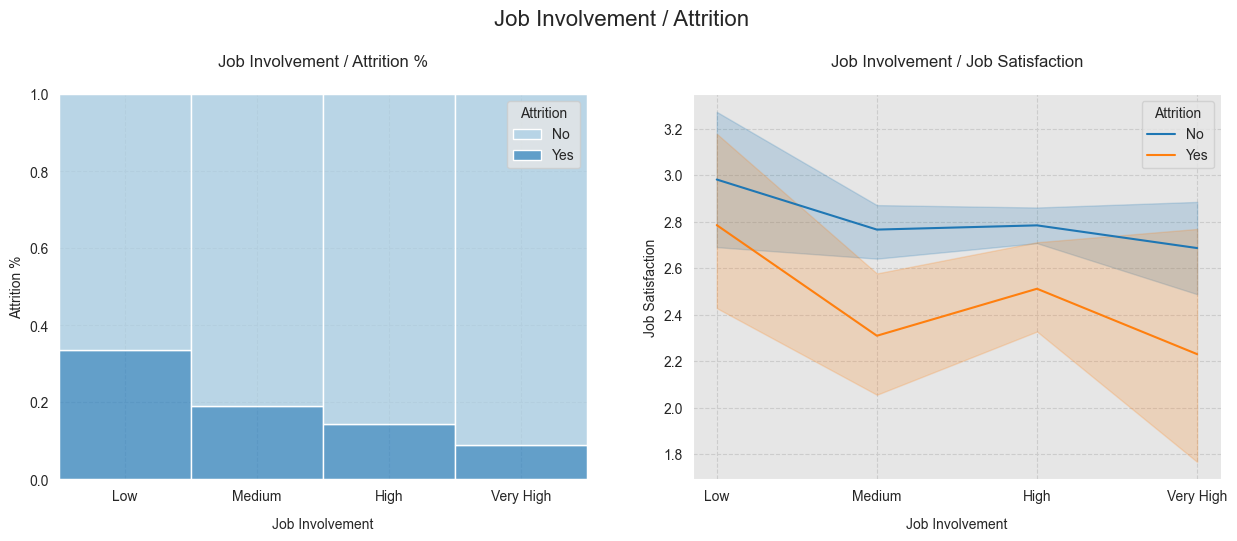

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Job Involvement / Attrition', fontsize=16, y=1.05, x=0.5)

fig46 = sns.histplot(data=df,
    x='JobInvolvement_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of JobInvolvement by Attrition
fig46.set_title('Job Involvement / Attrition %', y=1.05, x=0.5)
fig46.set_xlabel('Job Involvement', labelpad=10)
fig46.set_ylabel('Attrition %')

fig47 = sns.lineplot(data=df,
    x='JobInvolvement_Categorical',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])             # Plot a lineplot of JobInvolvement by JobSatisfaction
fig47.set_title('Job Involvement / Job Satisfaction', y=1.05, x=0.5)
fig47.set_xlabel('Job Involvement', labelpad=10)
fig47.set_ylabel('Job Satisfaction')

Employees with a higher job involvement level are less likely to leave the company than employees with a lower job involvement level.

#### Job Level

In [42]:
def job_level(x):
    if x == 1:
        return 'Entry'
    elif x == 2:
        return 'Mid'
    elif x == 3:
        return 'Senior'
    elif x == 4:
        return 'Manager'
    else:
        return 'Unknown'

# Convert the JobLevel column to a categorical variable and order it
df['JobLevel_Categorical'] = df['JobLevel'].apply(job_level)
df['JobLevel_Categorical'] = pd.Categorical(df['JobLevel_Categorical'],
    categories=['Entry', 'Mid', 'Senior', 'Manager'],
    ordered=True)

Text(0, 0.5, 'Job Satisfaction')

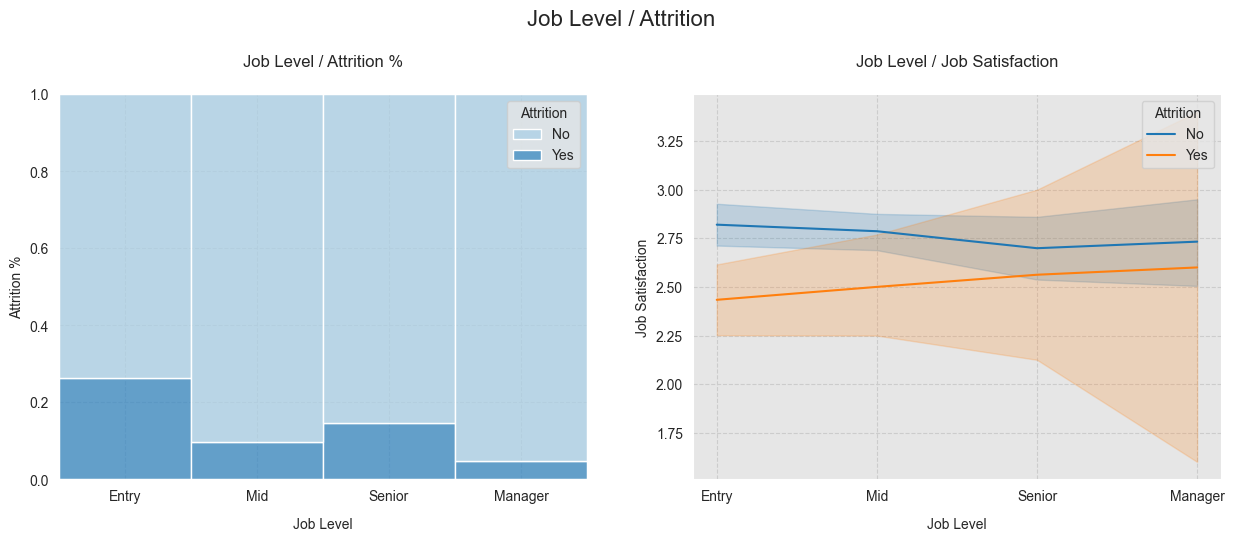

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Job Level / Attrition', fontsize=16, y=1.05, x=0.5)

fig48 = sns.histplot(data=df,
    x='JobLevel_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of JobLevel by Attrition
fig48.set_title('Job Level / Attrition %', y=1.05, x=0.5)
fig48.set_xlabel('Job Level', labelpad=10)
fig48.set_ylabel('Attrition %')

fig49 = sns.lineplot(data=df,
    x='JobLevel_Categorical',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])             # Plot a lineplot of JobLevel by JobSatisfaction
fig49.set_title('Job Level / Job Satisfaction', y=1.05, x=0.5)
fig49.set_xlabel('Job Level', labelpad=10)
fig49.set_ylabel('Job Satisfaction')

Employees with an entry-level job are more likely to leave the company than employees with a higher job level. This could be due to the fact that entry-level employees are usually younger.

#### Overtime

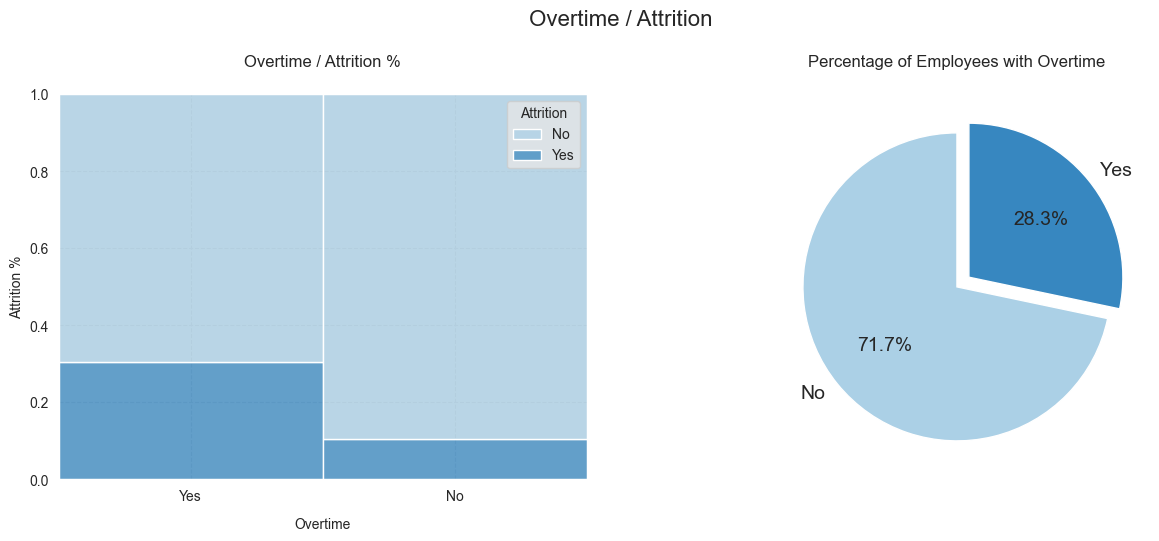

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Overtime / Attrition', fontsize=16, y=1.05, x=0.5)
piecolors = sns.color_palette('Blues', 2)

fig50 = sns.histplot(data=df,
    x='OverTime',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of OverTime by Attrition
fig50.set_title('Overtime / Attrition %', y=1.05, x=0.5)
fig50.set_xlabel('Overtime', labelpad=10)
fig50.set_ylabel('Attrition %')

fig51 = plt.pie(df['OverTime'].value_counts(),
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    colors=piecolors,
    explode=(0, 0.1),
    startangle=90,
    textprops={'fontsize': 14})             # Plot a pie chart of OverTime
fig51 = plt.title('Percentage of Employees with Overtime', y=1.05, x=0.5)


Employees who work overtime are much more likely to leave the company than employees who don't work overtime.

#### Performance Rating

In [45]:
def performance_rating(x):
    if x == 1:
        return 'Low'
    elif x == 2:
        return 'Good'
    elif x == 3:
        return 'Excellent'
    elif x == 4:
        return 'Outstanding'
    else:
        return 'Unknown'

# Convert the PerformanceRating column to a categorical variable and order it
df['PerformanceRating_Categorical'] = df['PerformanceRating'].apply(performance_rating)
df['PerformanceRating_Categorical'] = pd.Categorical(df['PerformanceRating_Categorical'],
    categories=['Low', 'Good', 'Excellent', 'Outstanding'],
    ordered=True)

Text(792.3131313131312, 0.5, 'Performance Rating')

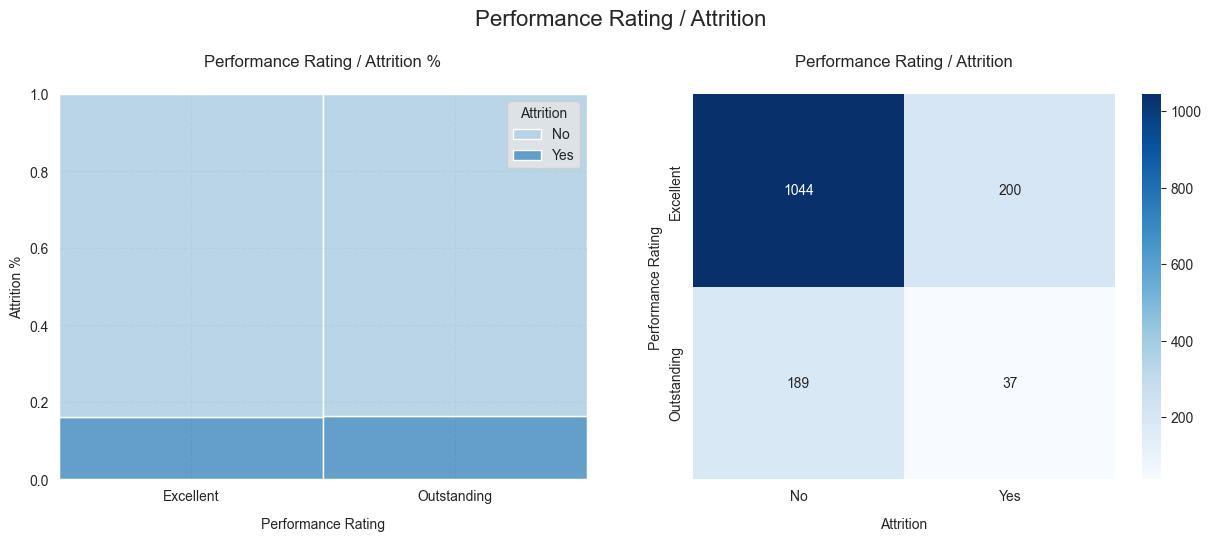

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Performance Rating / Attrition', fontsize=16, y=1.05, x=0.5)

fig52 = sns.histplot(data=df,
    x='PerformanceRating_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of PerformanceRating by Attrition
fig52.set_title('Performance Rating / Attrition %', y=1.05, x=0.5)
fig52.set_xlabel('Performance Rating', labelpad=10)
fig52.set_ylabel('Attrition %')

fig53 = sns.heatmap(pd.crosstab(df['PerformanceRating_Categorical'], df['Attrition']),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=ax[1])             # Plot a heatmap of PerformanceRating by Attrition
fig53.set_title('Performance Rating / Attrition', y=1.05, x=0.5)
fig53.set_xlabel('Attrition', labelpad=10)
fig53.set_ylabel('Performance Rating')

There doesn't seem to be a correlation between performance rating and employee attrition.

#### Relationship Satisfaction

In [47]:
def relationship_satisfaction(x):
    if x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    elif x == 3:
        return 'High'
    elif x == 4:
        return 'Very High'
    else:
        return 'Unknown'

# Convert the RelationshipSatisfaction column to a categorical variable and order it
df['RelationshipSatisfaction_Categorical'] = df['RelationshipSatisfaction'].apply(relationship_satisfaction)
df['RelationshipSatisfaction_Categorical'] = pd.Categorical(df['RelationshipSatisfaction_Categorical'],
    categories=['Low', 'Medium', 'High', 'Very High'],
    ordered=True)

Text(0, 0.5, 'Job Satisfaction')

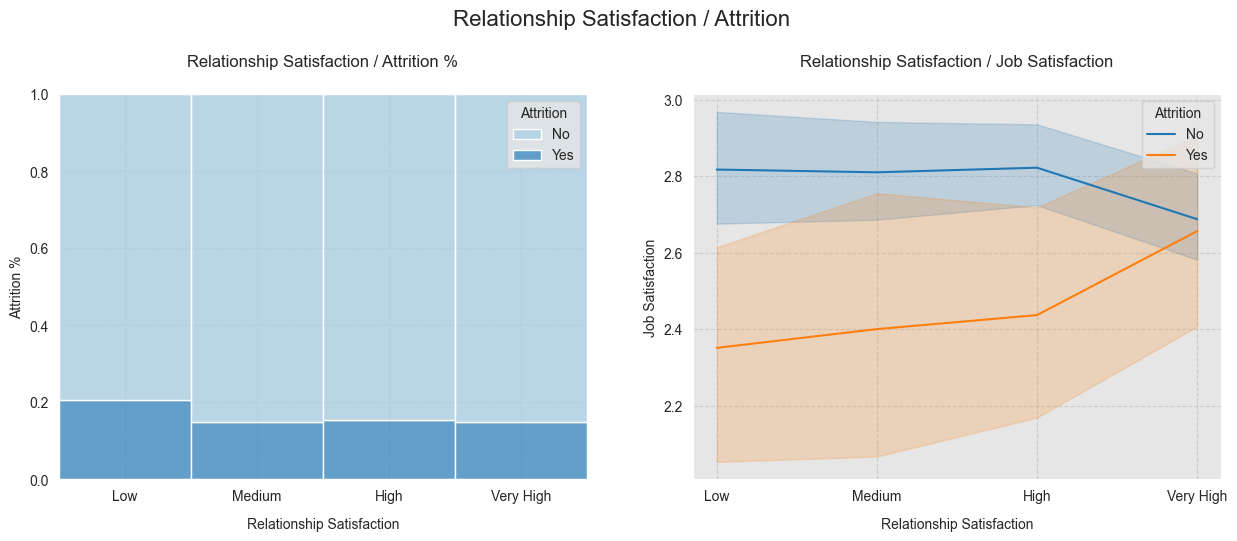

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Relationship Satisfaction / Attrition', fontsize=16, y=1.05, x=0.5)

fig54 = sns.histplot(data=df,
    x='RelationshipSatisfaction_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of RelationshipSatisfaction by Attrition
fig54.set_title('Relationship Satisfaction / Attrition %', y=1.05, x=0.5)
fig54.set_xlabel('Relationship Satisfaction', labelpad=10)
fig54.set_ylabel('Attrition %')

fig55 = sns.lineplot(data=df,
    x='RelationshipSatisfaction_Categorical',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])             # Plot a lineplot of RelationshipSatisfaction by JobSatisfaction
fig55.set_title('Relationship Satisfaction / Job Satisfaction', y=1.05, x=0.5)
fig55.set_xlabel('Relationship Satisfaction', labelpad=10)
fig55.set_ylabel('Job Satisfaction')

There doesn't seem to be a strong correlation between relationship satisfaction and employee attrition.

#### Work-Life Balance

In [49]:
def work_life_balance(x):
    if x == 1:
        return 'Bad'
    elif x == 2:
        return 'Good'
    elif x == 3:
        return 'Better'
    elif x == 4:
        return 'Best'
    else:
        return 'Unknown'

# Convert the WorkLifeBalance column to a categorical variable and order it
df['WorkLifeBalance_Categorical'] = df['WorkLifeBalance'].apply(work_life_balance)
df['WorkLifeBalance_Categorical'] = pd.Categorical(df['WorkLifeBalance_Categorical'],
    categories=['Bad', 'Good', 'Better', 'Best'],
    ordered=True)

Text(0, 0.5, 'Job Satisfaction')

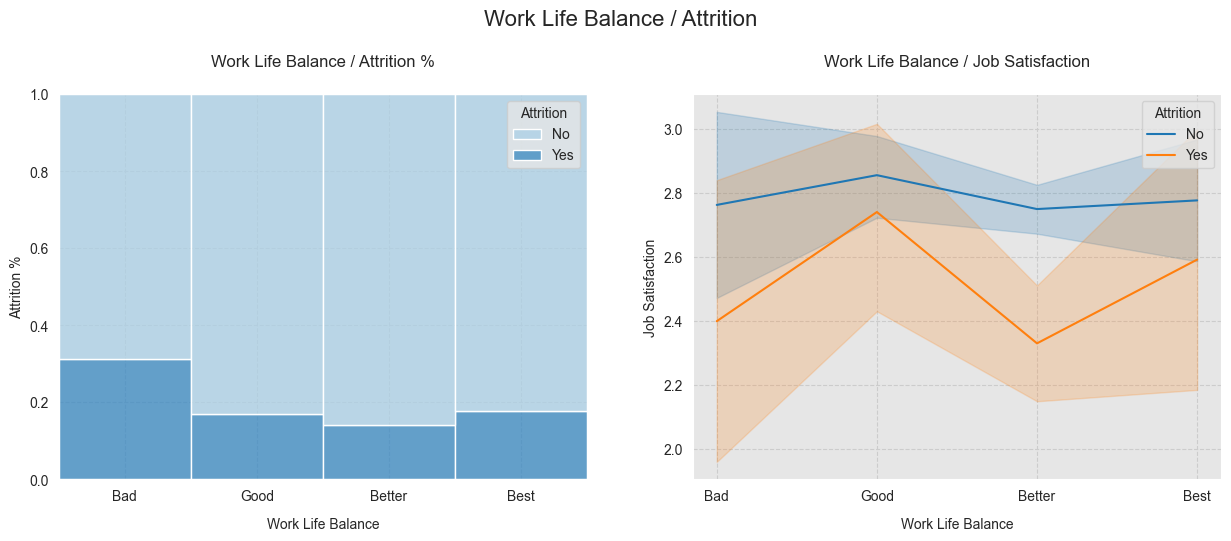

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Work Life Balance / Attrition', fontsize=16, y=1.05, x=0.5)

fig56 = sns.histplot(data=df,
    x='WorkLifeBalance_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of WorkLifeBalance by Attrition
fig56.set_title('Work Life Balance / Attrition %', y=1.05, x=0.5)
fig56.set_xlabel('Work Life Balance', labelpad=10)
fig56.set_ylabel('Attrition %')

fig57 = sns.lineplot(data=df,
    x='WorkLifeBalance_Categorical',
    y='JobSatisfaction',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    ax=ax[1])             # Plot a lineplot of WorkLifeBalance by JobSatisfaction
fig57.set_title('Work Life Balance / Job Satisfaction', y=1.05, x=0.5)
fig57.set_xlabel('Work Life Balance', labelpad=10)
fig57.set_ylabel('Job Satisfaction')

There is a strong correlation between work-life balance and employee attrition. Employees who have a bad work-life balance are more likely to leave the company than employees who have a good work-life balance.

#### Stock Option Level

In [51]:
def stock_option_amount(x):
    if x == 0:
        return 'No Stock Options'
    elif x == 1:
        return 'Low Amount'
    elif x == 2:
        return 'Medium Amount'
    elif x == 3:
        return 'High Amount'
    else:
        return 'Unknown'

# Convert the StockOptionLevel column to a categorical variable and order it
df['StockOptionLevel_Categorical'] = df['StockOptionLevel'].apply(stock_option_amount)
df['StockOptionLevel_Categorical'] = pd.Categorical(df['StockOptionLevel_Categorical'],
    categories=['No Stock Options', 'Low Amount', 'Medium Amount', 'High Amount'],
    ordered=True)


Text(792.3131313131312, 0.5, '')

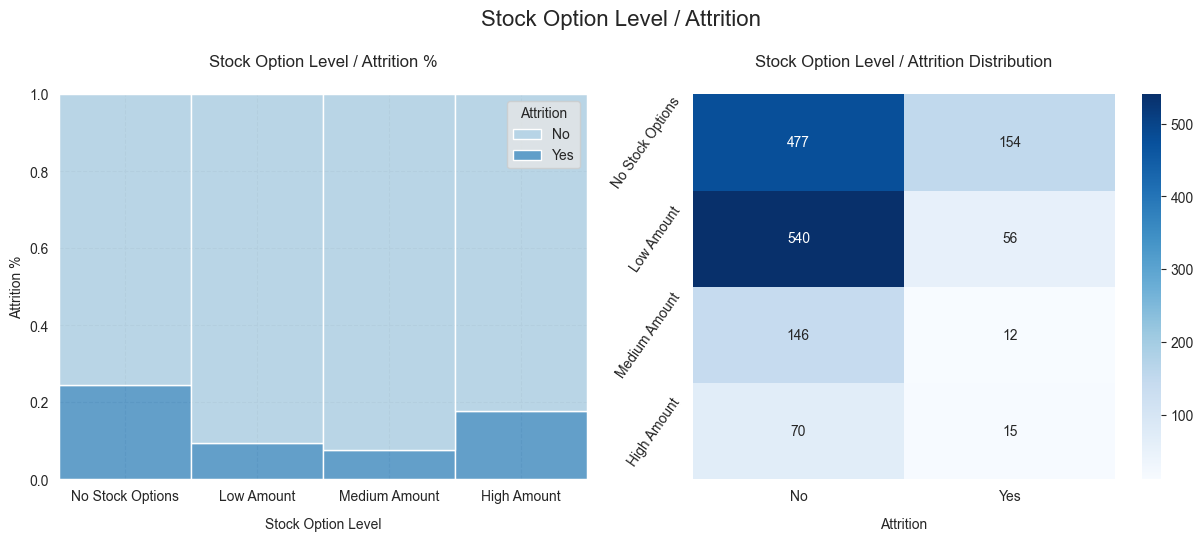

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Stock Option Level / Attrition', fontsize=16, y=1.05, x=0.5)

fig58 = sns.histplot(data=df,
    x='StockOptionLevel_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of StockOptionLevel by Attrition
fig58.set_title('Stock Option Level / Attrition %', y=1.05, x=0.5)
fig58.set_xlabel('Stock Option Level', labelpad=10)
fig58.set_ylabel('Attrition %')

fig59 = sns.heatmap(data=pd.crosstab(df['StockOptionLevel_Categorical'], df['Attrition']),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=ax[1])                     # Plot a heatmap of StockOptionLevel by Attrition
fig59.set_title('Stock Option Level / Attrition Distribution', y=1.05, x=0.5)
fig59.set_xlabel('Attrition', labelpad=10)
fig59.set_yticklabels(fig59.get_yticklabels(), rotation=55)
fig59.set_ylabel('')

There is a strong correlation between stock option level and employee attrition. Employees who have a low or medium stock option level are less likely to leave the company than employees who have a no stock options at all. 

However, employees with a high stock option level are more likely to leave the company than employees with a medium stock option level.

#### Training Sessions

In [53]:
def training_times_last_year(x):
    if x == 0:
        return 'No Training'
    elif x == 1:
        return 'Low Amount'
    elif x == 2:
        return 'Medium Amount'
    elif x == 3:
        return 'High Amount'
    elif x == 4:
        return 'Very High Amount'
    elif x == 5:
        return 'Extremely High Amount'
    else:
        return 'Unknown'

# Convert the TrainingTimesLastYear column to a categorical variable and order it
df['TrainingTimesLastYear_Categorical'] = df['TrainingTimesLastYear'].apply(training_times_last_year)
df['TrainingTimesLastYear_Categorical'] = pd.Categorical(df['TrainingTimesLastYear_Categorical'],
    categories=['No Training', 'Low Amount', 'Medium Amount', 'High Amount', 'Very High Amount', 'Extremely High Amount'],
    ordered=True)

C:\Users\esser\AppData\Local\Temp\ipykernel_5688\3662011754.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig60.set_xticklabels(fig60.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.05, 'Training Times Last Year / Distribution')

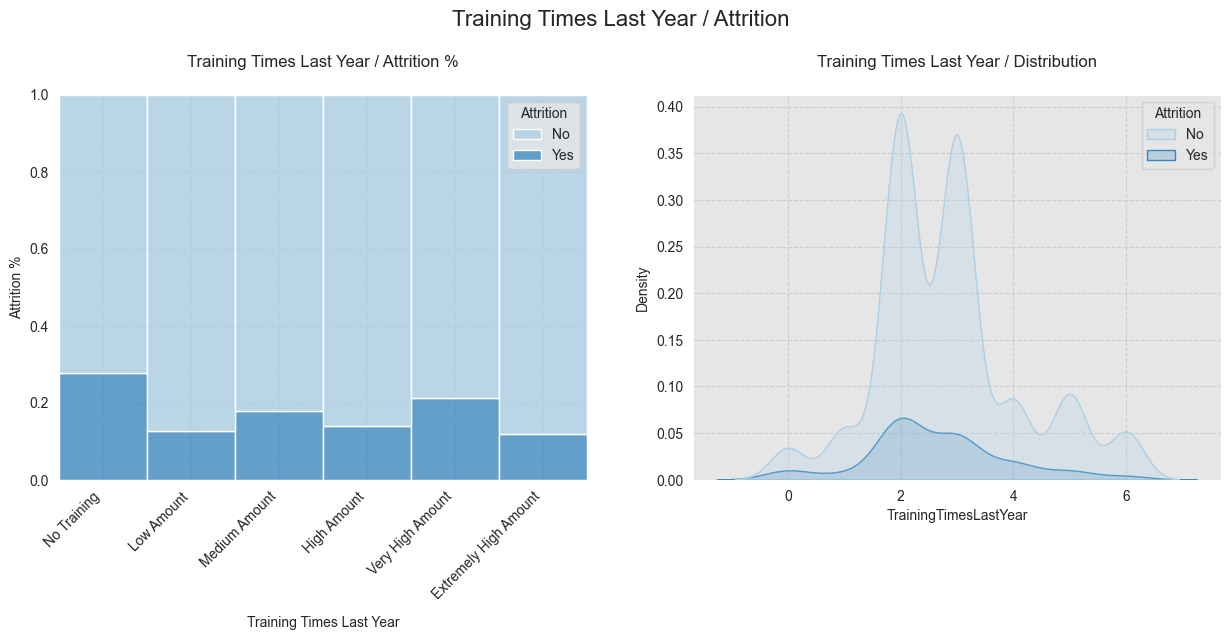

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Create a figure with two subplots
fig.suptitle('Training Times Last Year / Attrition', fontsize=16, y=1.05, x=0.5)

fig60 = sns.histplot(data=df,
    x='TrainingTimesLastYear_Categorical',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    multiple='fill',
    ax=ax[0],
    palette='Blues')             # Plot a histogram of TrainingTimesLastYear by Attrition
fig60.set_title('Training Times Last Year / Attrition %', y=1.05, x=0.5)
fig60.set_xlabel('Training Times Last Year', labelpad=10)
fig60.set_xticklabels(fig60.get_xticklabels(), rotation=45, ha='right')
fig60.set_ylabel('Attrition %')

fig61 = sns.kdeplot(data=df,
    x='TrainingTimesLastYear',
    hue='Attrition',
    hue_order=['No', 'Yes'],
    fill=True,
    palette='Blues',
    ax=ax[1])             # Plot a kdeplot of TrainingTimesLastYear by Attrition
fig61.set_title('Training Times Last Year / Distribution', y=1.05, x=0.5)

There is some correlation between the number of training sessions the employee has attended in the last year and employee attrition. Employees with no training sessions are more likely to leave the company than employees with more training sessions.

## Conclusion

In conclusion, this Jupyter Notebook has provided a comprehensive Exploratory Data Analysis (EDA) of the IBM Employee Attrition Dataset. Our analysis has shown that several factors such as age, job role, marital status, and education level play a significant role in employee attrition. Additionally, we found that employees who work overtime or have low job satisfaction tend to leave the company more frequently. This information can be used by IBM to develop strategies to improve employee retention and reduce attrition.

By creating visualizations and performing statistical tests, we have gained a deeper understanding of the data and identified trends and relationships. However, this analysis is not exhaustive and there may be other factors that contribute to employee attrition. Further research and analysis may be necessary to develop a complete picture of the situation.

Overall, this EDA has provided valuable insights into the IBM Employee Attrition Dataset and can be used to inform future decision-making. By continuing to explore and analyze this data, organizations can work to improve employee retention and create a more positive work environment.